# Machine Learning for Business & Data Visualisation CA2
    Kate O'Dwyer



https://www.kaggle.com/code/samruddhim/part-2-time-series-analysis

## Import Libraries & Remove Warnings 

In [32]:
#Disable the warnings
import warnings
warnings.filterwarnings('ignore')


#Importing Libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import statistics as stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
import scipy as scipy

## Reading in Data Set

In [54]:
df = pd.read_csv('train.csv', na_values = 'na')

## Investigating Data Set

In [55]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [56]:
df.tail()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,9800,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [57]:
df.info() #information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9800 entries, 0 to 9799
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9800 non-null   int64  
 1   Order ID       9800 non-null   object 
 2   Order Date     9800 non-null   object 
 3   Ship Date      9800 non-null   object 
 4   Ship Mode      9800 non-null   object 
 5   Customer ID    9800 non-null   object 
 6   Customer Name  9800 non-null   object 
 7   Segment        9800 non-null   object 
 8   Country        9800 non-null   object 
 9   City           9800 non-null   object 
 10  State          9800 non-null   object 
 11  Postal Code    9789 non-null   float64
 12  Region         9800 non-null   object 
 13  Product ID     9800 non-null   object 
 14  Category       9800 non-null   object 
 15  Sub-Category   9800 non-null   object 
 16  Product Name   9800 non-null   object 
 17  Sales          9800 non-null   float64
dtypes: float

- Will need to turn the data into a time series, will also need to remove the NaNs as there seems to be a lot at the the end of the data frame. Will also remove the unnamed column

In [58]:
print(df.isnull().sum())

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Customer Name     0
Segment           0
Country           0
City              0
State             0
Postal Code      11
Region            0
Product ID        0
Category          0
Sub-Category      0
Product Name      0
Sales             0
dtype: int64


- Will remove all NaNs first before proceeding.

# Data Cleaning

#### Drop 'Row ID'

In [59]:
df.drop(['Row ID'] , axis = 1 , inplace = True)

#### Drop NaNs

In [60]:
df.dropna(axis=0, inplace = True)

In [61]:
df.tail()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
9795,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.798
9796,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.368
9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.188
9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.376
9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-AC-10000487,Technology,Accessories,SanDisk Cruzer 4 GB USB Flash Drive,10.384


In [62]:
print(df.isnull().sum())

Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
dtype: int64


#### Convert Date to datetime series

In [64]:
# Convert date column to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'],format="%d/%m/%Y")

In [65]:
# Checking the data type 

df.dtypes

Order ID                 object
Order Date       datetime64[ns]
Ship Date                object
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code             float64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
dtype: object

#### Check for duplicated values

In [66]:
#Check for duplicate values
print("Number of Duplicated Values: ",df.duplicated().sum())

Number of Duplicated Values:  1


In [67]:
#Drop duplicates
df.drop_duplicates(inplace=True)

In [68]:
df.duplicated().sum()

0

Sort by order date:

In [70]:
#sorting data by order date
df.sort_values(by=['Order Date'], inplace=True, ascending=True) #Sorting data by  ascending order of the coloumn values 'Order Date'
df.set_index("Order Date", inplace = True) #Setting 'Order Date' as index of the dataframe 'df' for ease of Time Series Analysis

Create a new data frame to perform time series on:

In [71]:
df_ts = pd.DataFrame(df['Sales'])
df_ts

,Sales
Order Date,
2015-01-03,16.448
2015-01-04,3.540
2015-01-04,272.736
2015-01-04,11.784
2015-01-05,19.536
...,...
2018-12-30,323.136
2018-12-30,52.776
2018-12-30,90.930


# EDAs

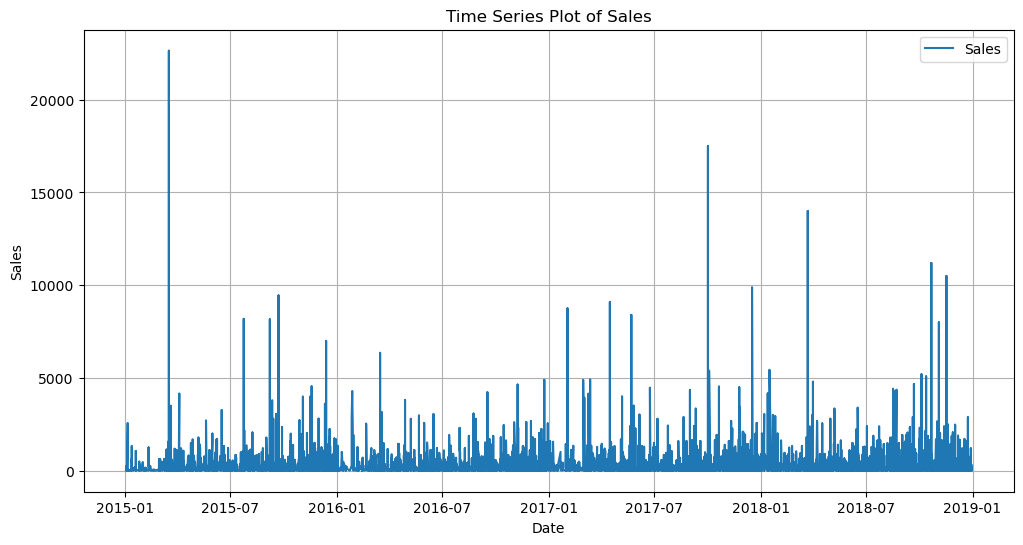

In [72]:
plt.figure(figsize=(12, 6))
plt.plot(df_ts['Sales'], label='Sales')
plt.title('Time Series Plot of Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

Can we predict the Sales using time series forcasting? 

# Stationary Check - Augmented Dickey-Fuller (ADF) Test:

In [74]:
from statsmodels.tsa.stattools import adfuller

H0 : time series in non stationary 
H1 : time series is stationary

In [75]:
adfuller(df_ts["Sales"])

(-98.40271949957884,
 0.0,
 0,
 9787,
 {'1%': -3.431018337178052,
  '5%': -2.861835364568582,
  '10%': -2.566927217432654},
 153219.6269462235)

As p = 0.0 and is thus below the signifigance level (alpha = 0.05) we can regevt H0 which indicates that the time series is stationary. 

## ACF and PACF Plot:

<Figure size 1200x600 with 0 Axes>

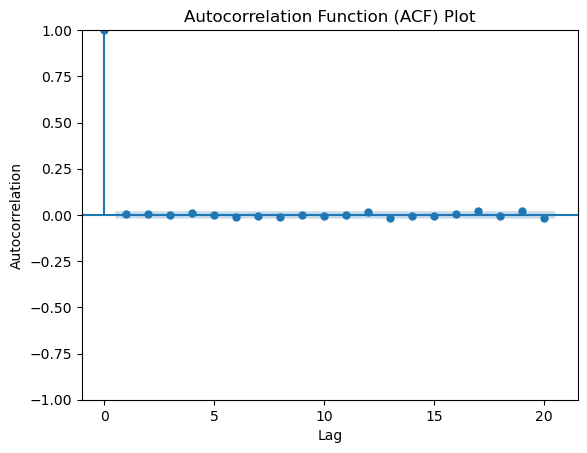

In [83]:
from statsmodels.graphics.tsaplots import plot_acf

plt.figure(figsize=(12, 6))
plot_acf(df_ts, lags=20)
plt.title('Autocorrelation Function (ACF) Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

<Figure size 1200x600 with 0 Axes>

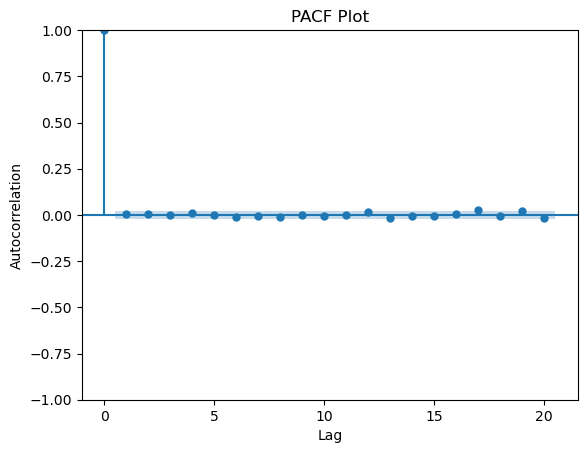

In [84]:
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(12, 6))
plot_pacf(df_ts, lags=20)
plt.title('PACF Plot')
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.show()

In [88]:
from statsmodels.tsa.arima.model import ARMA

model = ARMA(df_ts, order=(1,1))

results = model.fit()

ImportError: cannot import name 'ARMA' from 'statsmodels.tsa.arima.model' (C:\Users\multiflow\anaconda3\Lib\site-packages\statsmodels\tsa\arima\model.py)

In [89]:
import statsmodels.tsa.api as sm

In [94]:
model = sm.ARIMA(df_ts["Sales"], order=(1, 0, 1)).fit()

In [95]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Sales   No. Observations:                 9788
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -76905.806
Date:                Sun, 19 Nov 2023   AIC                         153819.611
Time:                        22:10:42   BIC                         153848.367
Sample:                             0   HQIC                        153829.355
                               - 9788                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        230.1110      9.548     24.101      0.000     211.397     248.825
ar.L1          0.2463      1.875      0.131      0.895      -3.428       3.921
ma.L1         -0.2401      1.877     -0.128      0.898      -3.919       3.439
sigma2      3.911e+05    699.865    558.872      0.000     3.9e+05    3.93e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):          38777679.56
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.80   Skew:                            13.05
Prob(H) (two-sided):                  0.00   Kurtosis:                       310.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# Forecast Steps

In [98]:
forecast_steps = 10
forecast_results = results.get_forecast(steps=forecast_steps)

NameError: name 'results' is not defined

In [96]:
pred_time = 10
result = model.predict(pred_time)

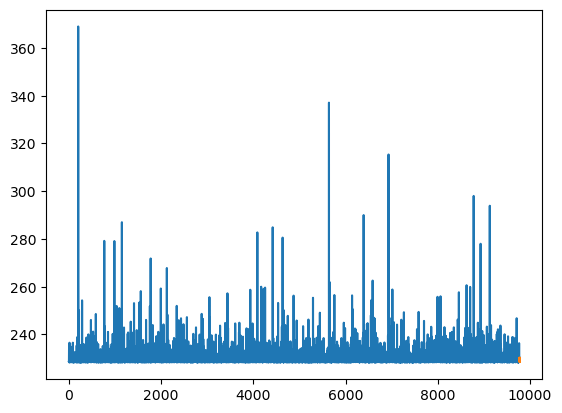

In [97]:
plt.plot(range(len(result)-pred_time), result[:-pred_time])
plt.plot(range(len(result)-pred_time, len(result)), result[-pred_time:])

# EDAs

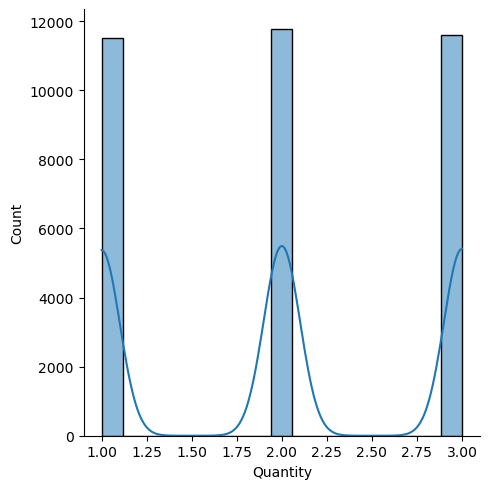

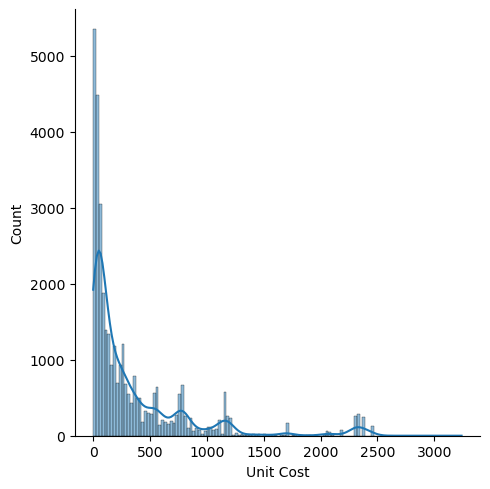

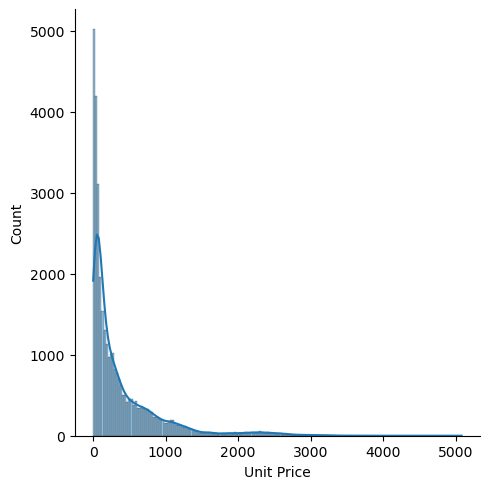

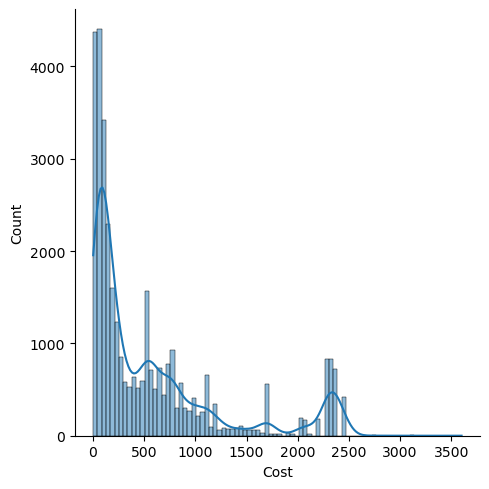

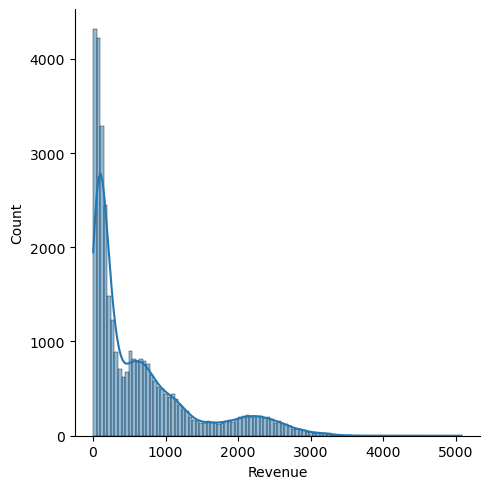

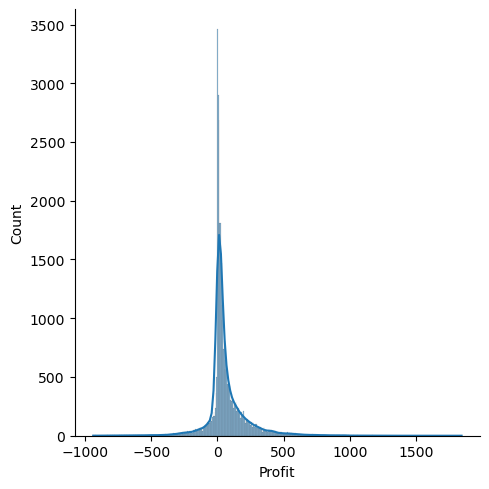

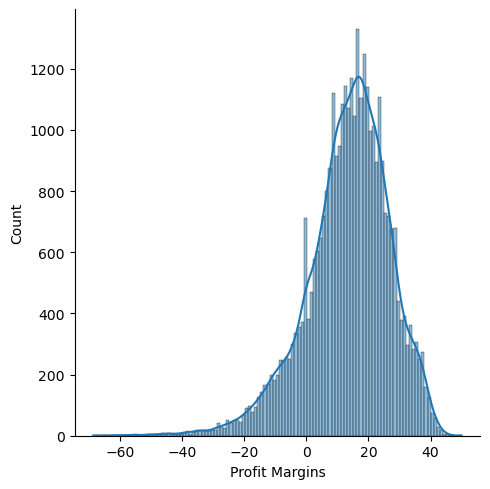

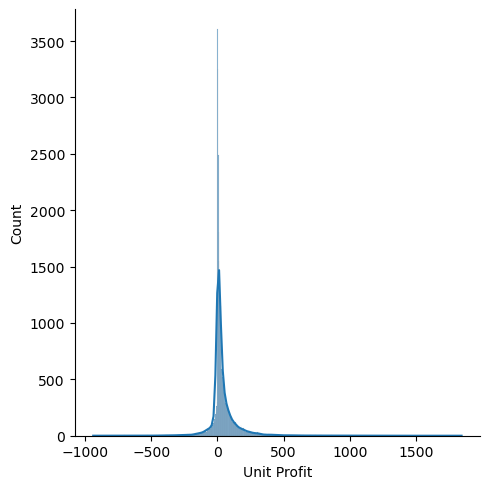

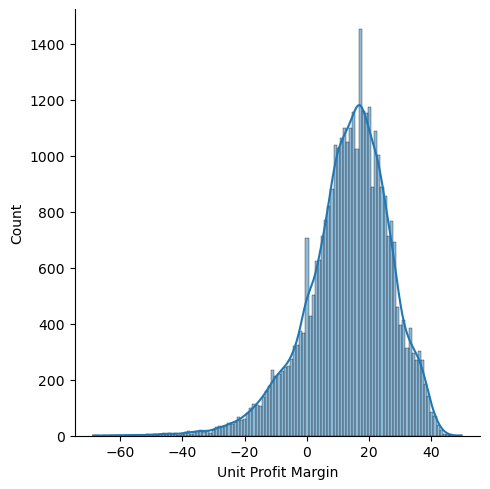

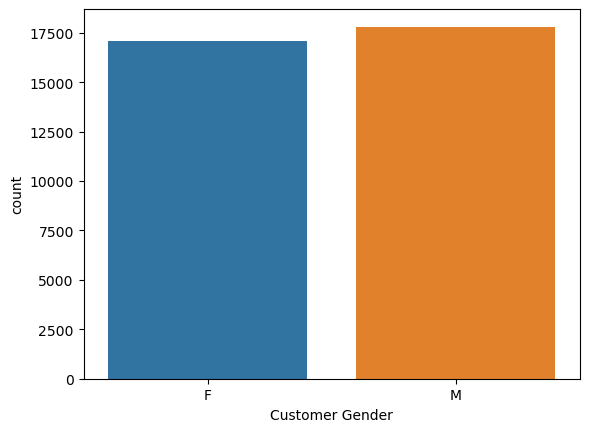

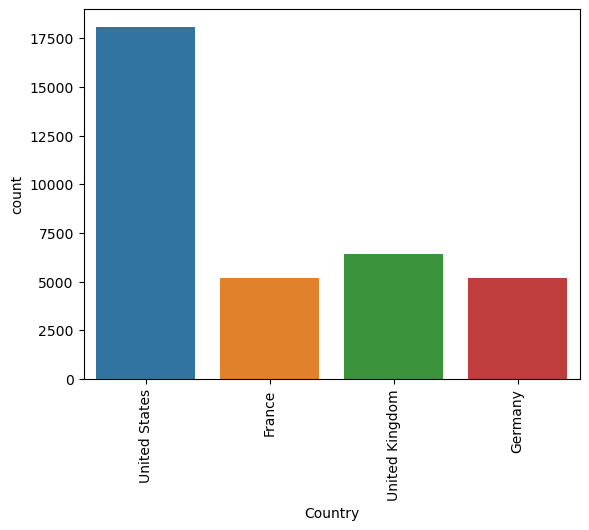

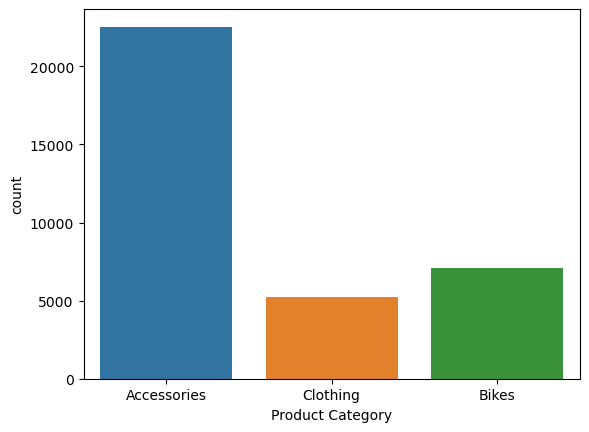

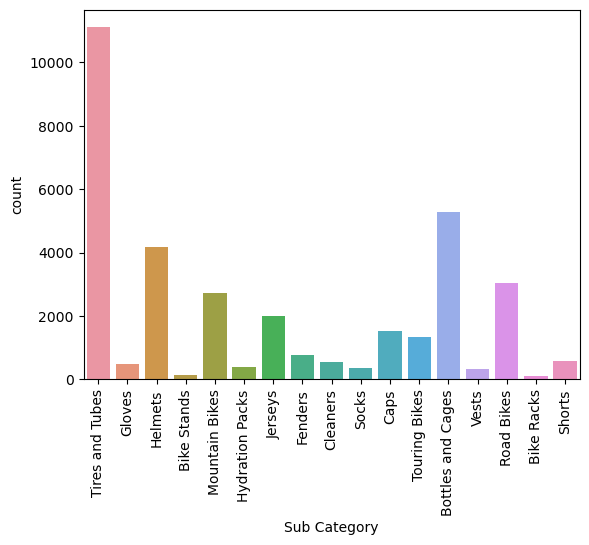

In [26]:
# Distribution of numeric columns
sns.displot(df['Quantity'], kde=True)
plt.show()

sns.displot(df['Unit Cost'], kde=True)
plt.show()

sns.displot(df['Unit Price'], kde=True)
plt.show()

sns.displot(df['Cost'], kde=True)
plt.show()

sns.displot(df['Revenue'], kde=True)
plt.show()

sns.displot(df['Profit'], kde=True)
plt.show()

sns.displot(df['Profit Margins'], kde=True)
plt.show()

sns.displot(df['Unit Profit'], kde=True)
plt.show()

sns.displot(df['Unit Profit Margin'], kde=True)
plt.show()

# Bar plot of categorical columns
sns.countplot(df['Customer Gender'])
plt.show()

sns.countplot(df['Country'])
plt.xticks(rotation=90)
plt.show()

sns.countplot(df['Product Category'])
plt.show()

sns.countplot(df['Sub Category'])
plt.xticks(rotation=90)
plt.show()

<AxesSubplot:xlabel='Date,Country'>

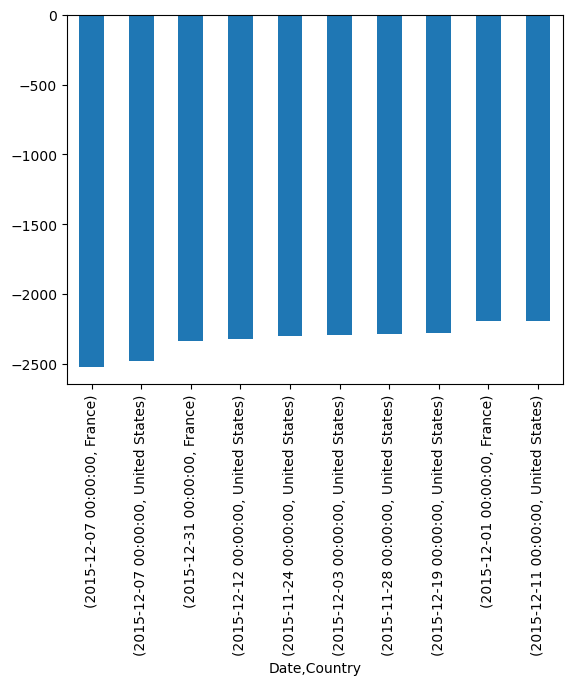

In [27]:
loss_df = df[df['Revenue'] < df['Cost']]
loss = loss_df.groupby(['Date' , 'Country'])
loss['Profit'].sum().sort_values(ascending=True).head(10).plot.bar()

<AxesSubplot:ylabel='Country,State'>

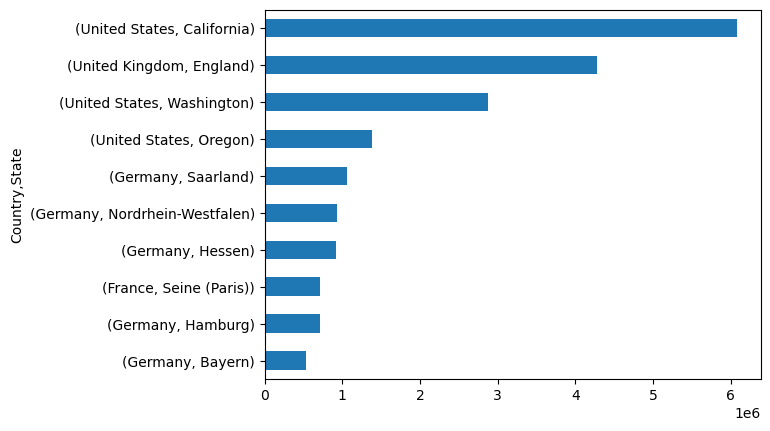

In [28]:
df.groupby(['Country','State'])['Revenue'].sum().sort_values(ascending=True).tail(10).plot.barh()

In [29]:
df.describe()

,Year,Customer Age,Quantity,Unit Cost,Unit Price,Cost,Revenue,Profit,Profit Margins,Unit Profit,Unit Profit Margin,Loss
count,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000,34865.000000
mean,2015.569253,36.382705,2.002524,349.890315,389.243248,576.020479,640.887652,64.867173,13.407121,39.352933,13.406658,0.139223
std,0.495188,11.113005,0.813948,490.019492,525.322781,690.503877,736.653849,152.881797,13.544420,104.936259,13.544251,0.346184
min,2015.000000,17.000000,1.000000,0.670000,0.666667,2.000000,2.000000,-937.000000,-68.670000,-937.000000,-68.670000,0.000000
25%,2015.000000,28.000000,1.000000,45.000000,53.666667,85.000000,102.000000,5.000000,6.170000,3.000000,6.170000,0.000000
50%,2016.000000,35.000000,2.000000,150.000000,179.000000,261.000000,319.000000,27.000000,14.800000,14.500000,14.790000,0.000000
75%,2016.000000,44.000000,3.000000,455.000000,521.000000,769.000000,902.000000,96.000000,22.570000,53.000000,22.570000,0.000000
max,2016.000000,87.000000,3.000000,3240.000000,5082.000000,3600.000000,5082.000000,1842.000000,50.000000,1842.000000,49.750000,1.000000


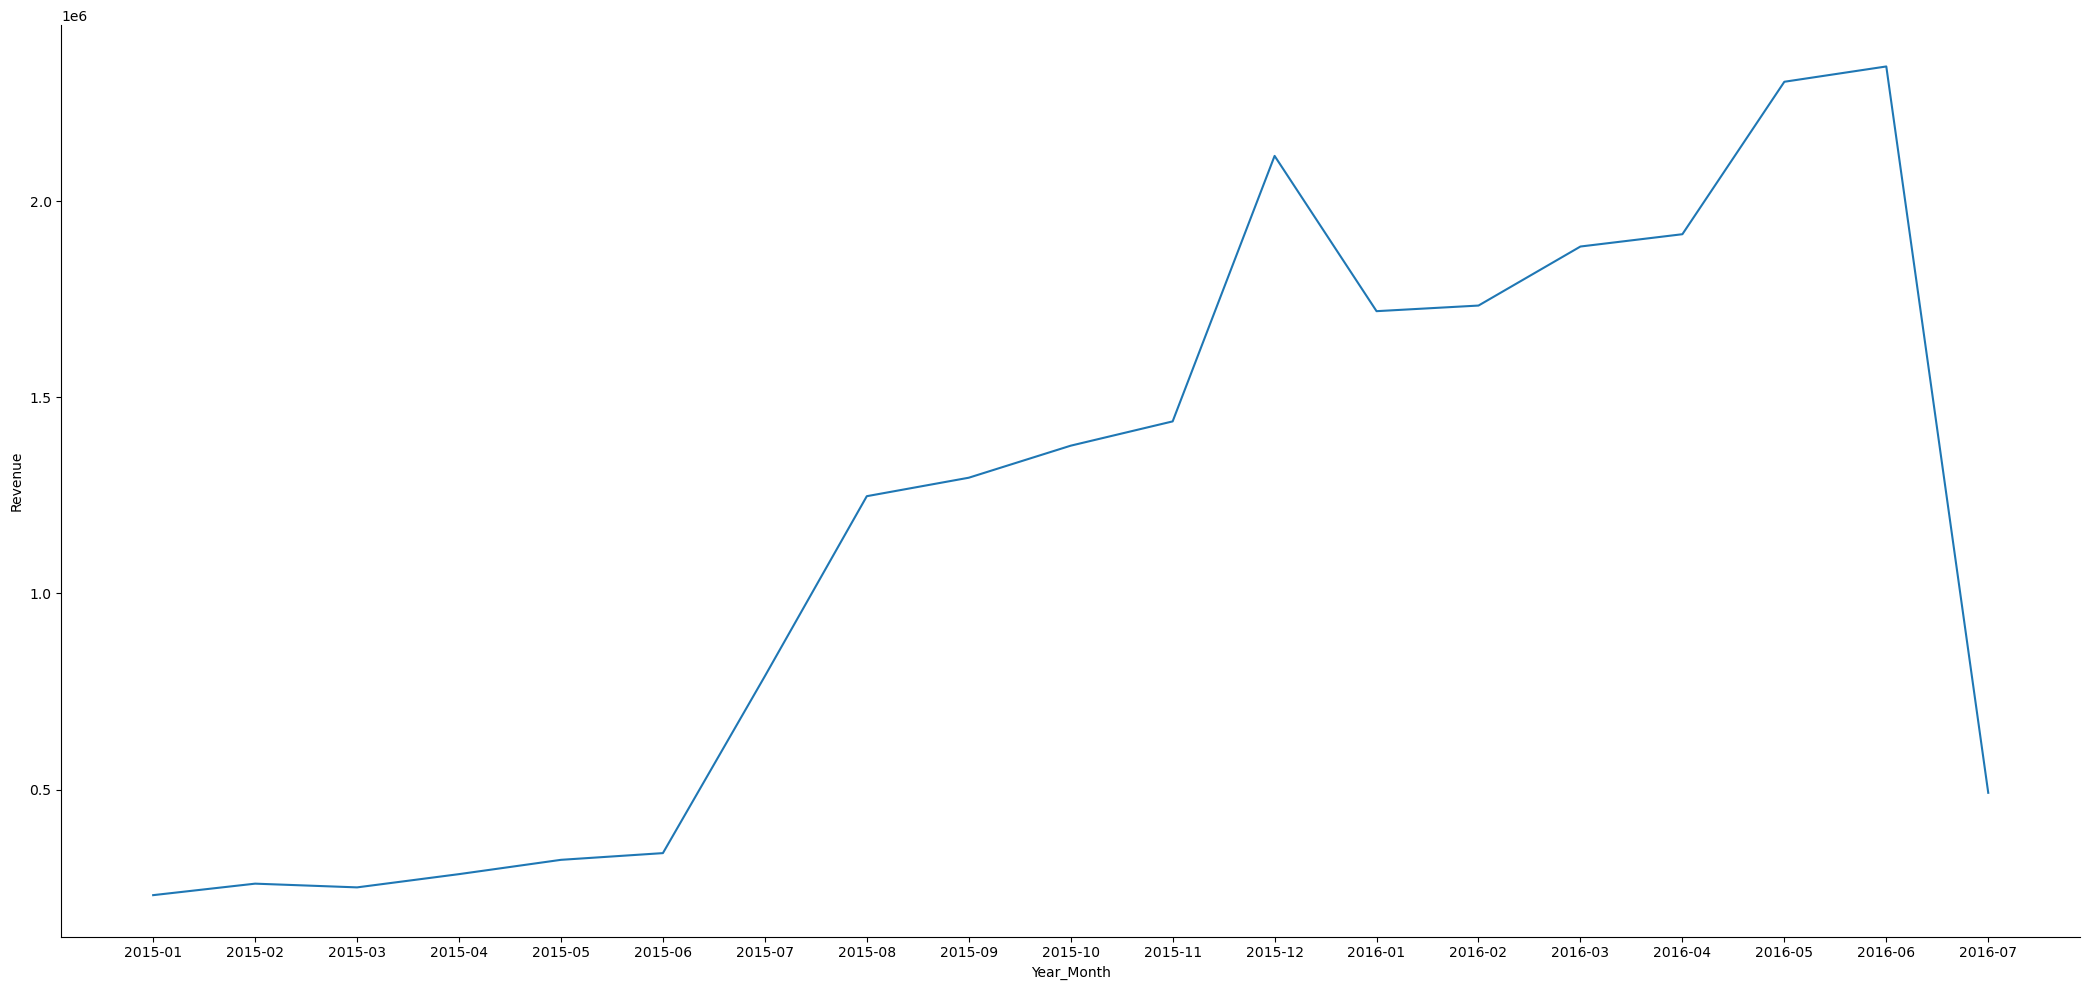

In [30]:
# Group data by Revenue and month
Month_Revenue = df.groupby(['Year_Month'])['Revenue'].sum().reset_index()
sns.relplot(data=Month_Revenue, x="Year_Month", y="Revenue", kind="line", height =10, aspect = 2.1)

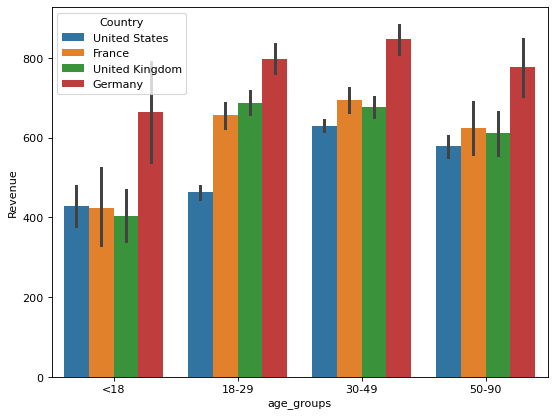

In [31]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
ax=sns.barplot(x='age_groups',y='Revenue', hue="Country" , data=df)

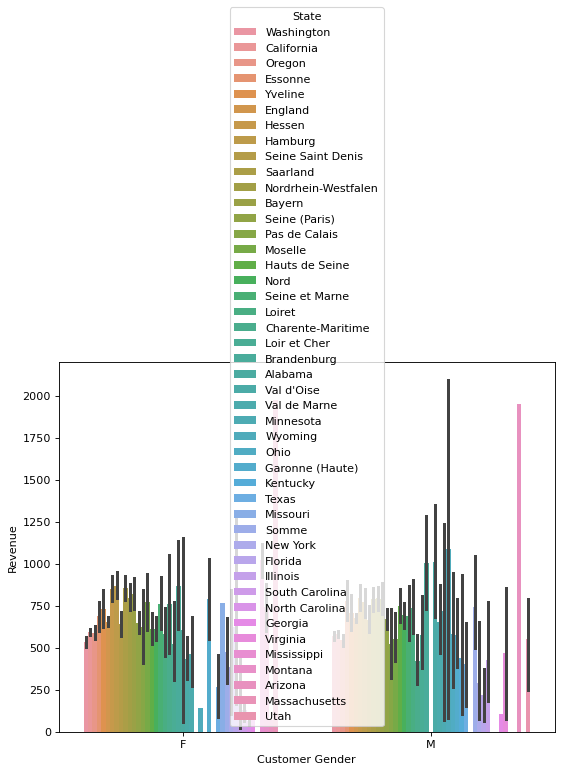

In [32]:
from matplotlib.pyplot import figure

figure(figsize=(8, 6), dpi=80)
ax=sns.barplot(x='Customer Gender',y='Revenue', hue="State" , data=df)

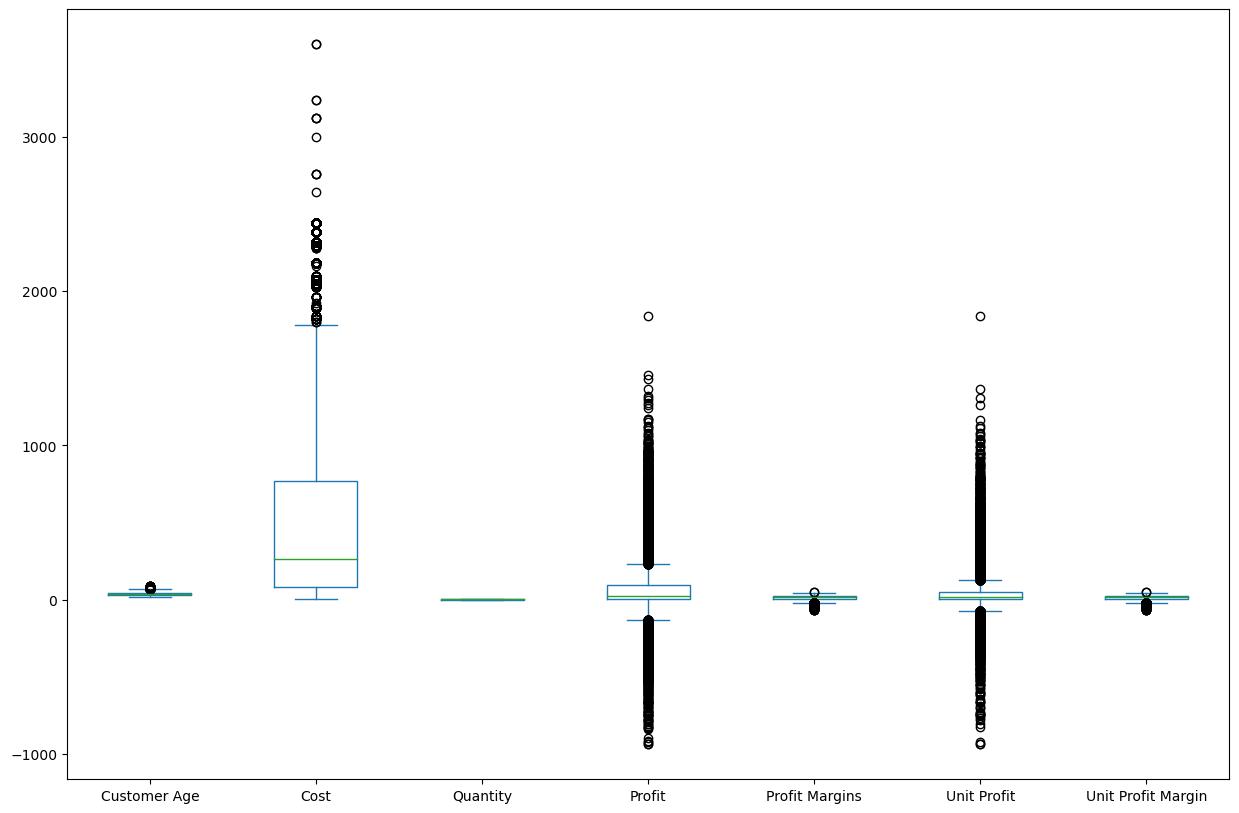

In [33]:
# Plot boxplots of the numerical features again
desc_cols = ['Customer Age', 'Cost', 'Quantity', 'Profit', 'Profit Margins', 'Unit Profit', 'Unit Profit Margin']
df[desc_cols].plot(kind='box', figsize=(15,10))
plt.show()

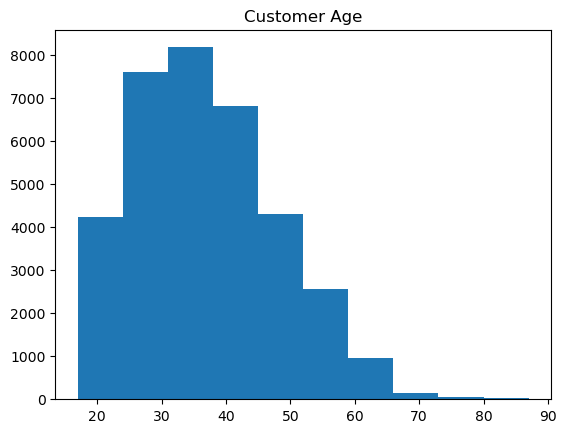

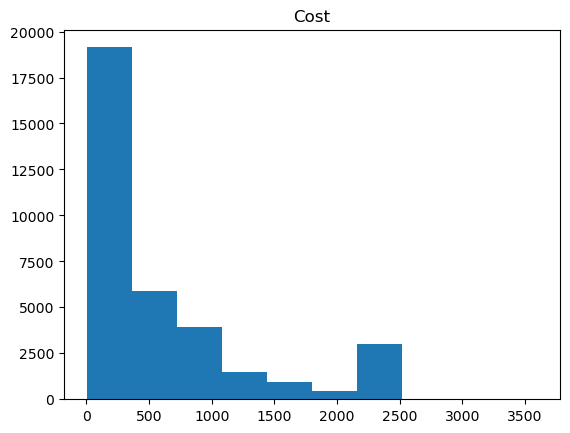

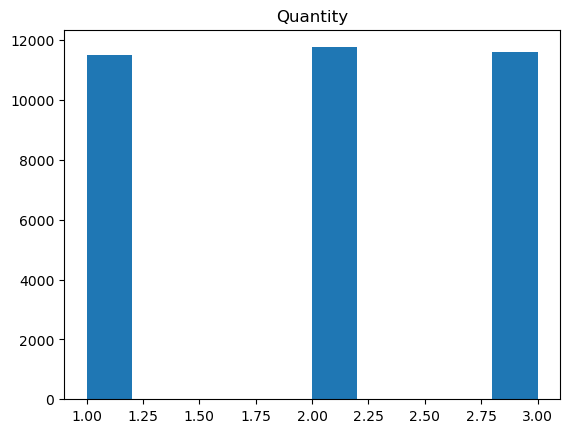

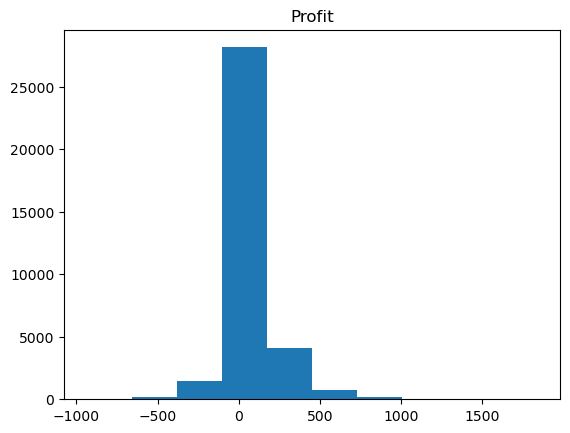

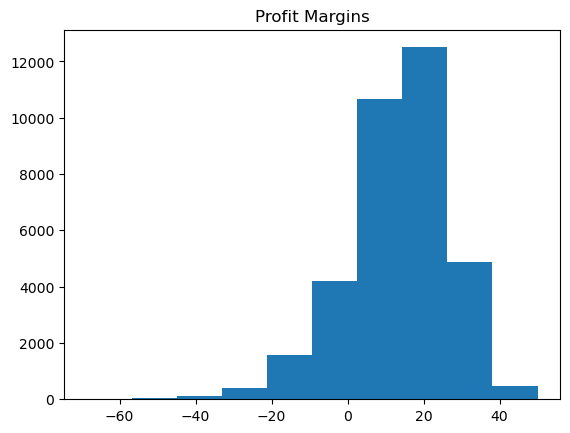

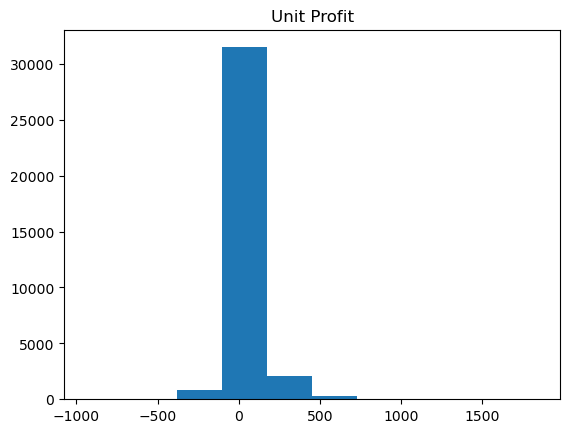

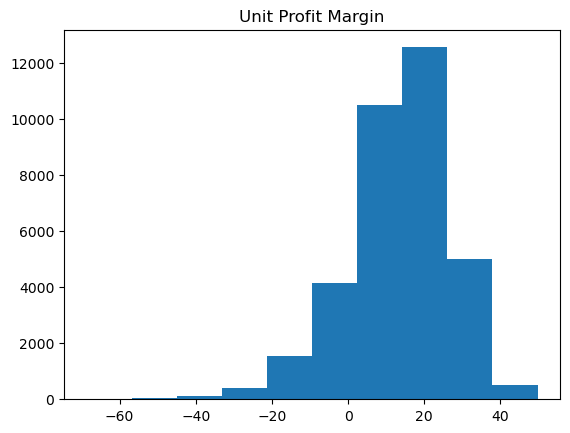

       Customer Age          Cost      Quantity        Profit  Profit Margins  \
count  34865.000000  34865.000000  34865.000000  34865.000000    34865.000000   
mean      36.382705    576.020479      2.002524     64.867173       13.407121   
std       11.113005    690.503877      0.813948    152.881797       13.544420   
min       17.000000      2.000000      1.000000   -937.000000      -68.670000   
25%       28.000000     85.000000      1.000000      5.000000        6.170000   
50%       35.000000    261.000000      2.000000     27.000000       14.800000   
75%       44.000000    769.000000      3.000000     96.000000       22.570000   
max       87.000000   3600.000000      3.000000   1842.000000       50.000000   

        Unit Profit  Unit Profit Margin  
count  34865.000000        34865.000000  
mean      39.352933           13.406658  
std      104.936259           13.544251  
min     -937.000000          -68.670000  
25%        3.000000            6.170000  
50%       14.50000

In [34]:
import matplotlib.pyplot as plt

# Separate the target variable from the rest of the data
X_x = df.drop('Revenue', axis=1)

# Loop over each numerical column and create a histogram
for col in desc_cols:
    plt.hist(X_x[col])
    plt.title(col)
    plt.show()

# Compute summary statistics of the numerical features
summary = X_x[desc_cols].describe()
print(summary)

# Compute pairwise correlations between the numerical features
corr_matrix = X_x[desc_cols].corr()
print(corr_matrix)

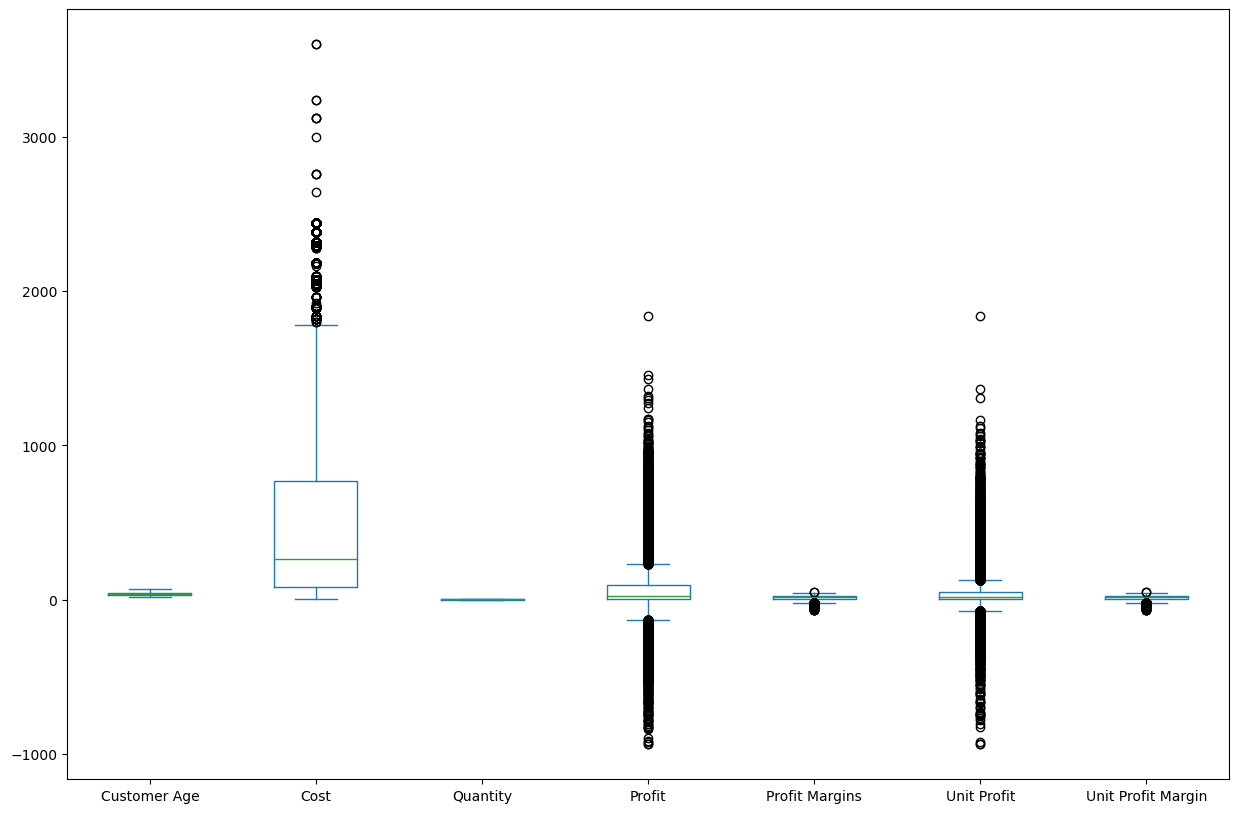

In [35]:
#Remove outliers
# Calculate the IQR for the Customer Age feature
Q1 = df['Customer Age'].quantile(0.25)
Q3 = df['Customer Age'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers outside the bounds
df_no_outliers=df[(df['Customer Age'] >= lower_bound) & (df['Customer Age'] <= upper_bound)]

# Plot boxplots of the numerical features again
df_no_outliers[desc_cols].plot(kind='box', figsize=(15,10))
plt.show()

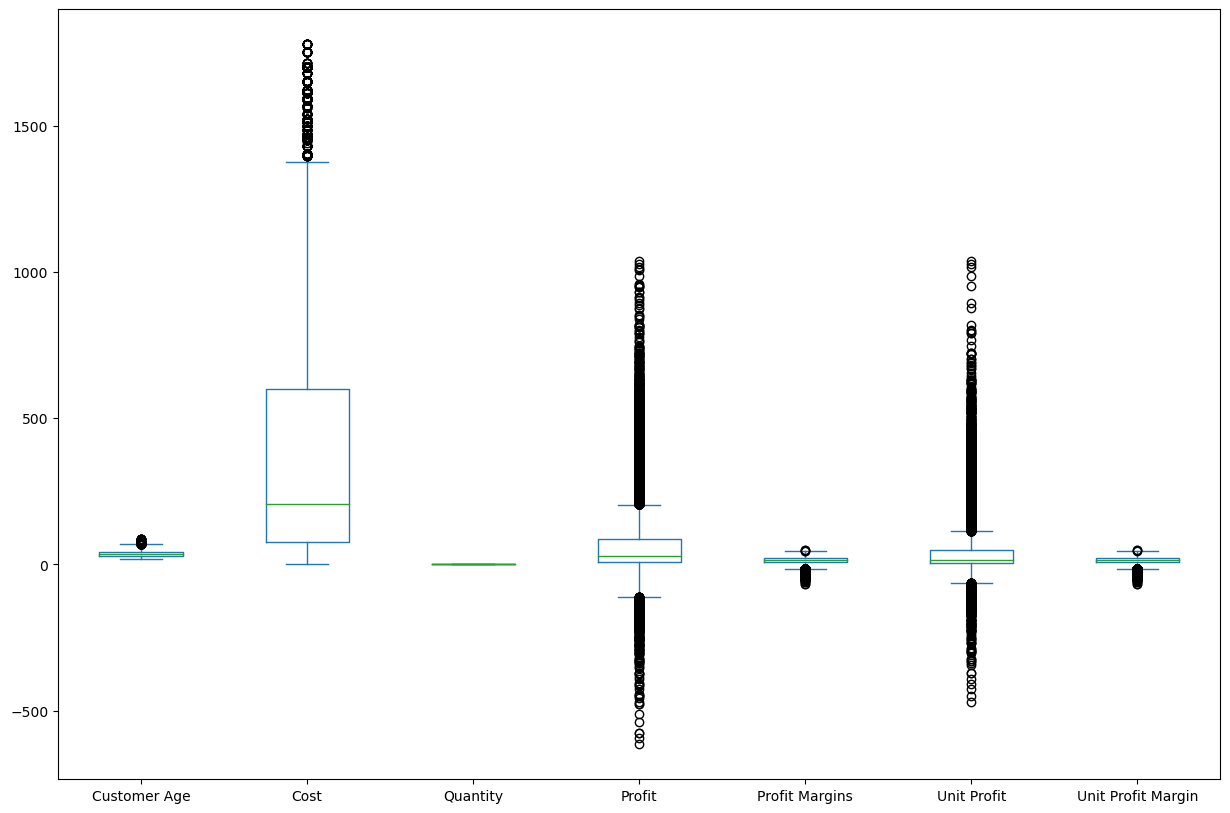

In [36]:
# Calculate the IQR for the Mortgage feature
Q1 = df['Cost'].quantile(0.25)
Q3 = df['Cost'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers outside the bounds
df_no_outliers = df[(df['Cost'] >= lower_bound) & (df['Cost'] <= upper_bound)]

# Plot boxplots of the numerical features again
df_no_outliers[desc_cols].plot(kind='box', figsize=(15,10))
plt.show()

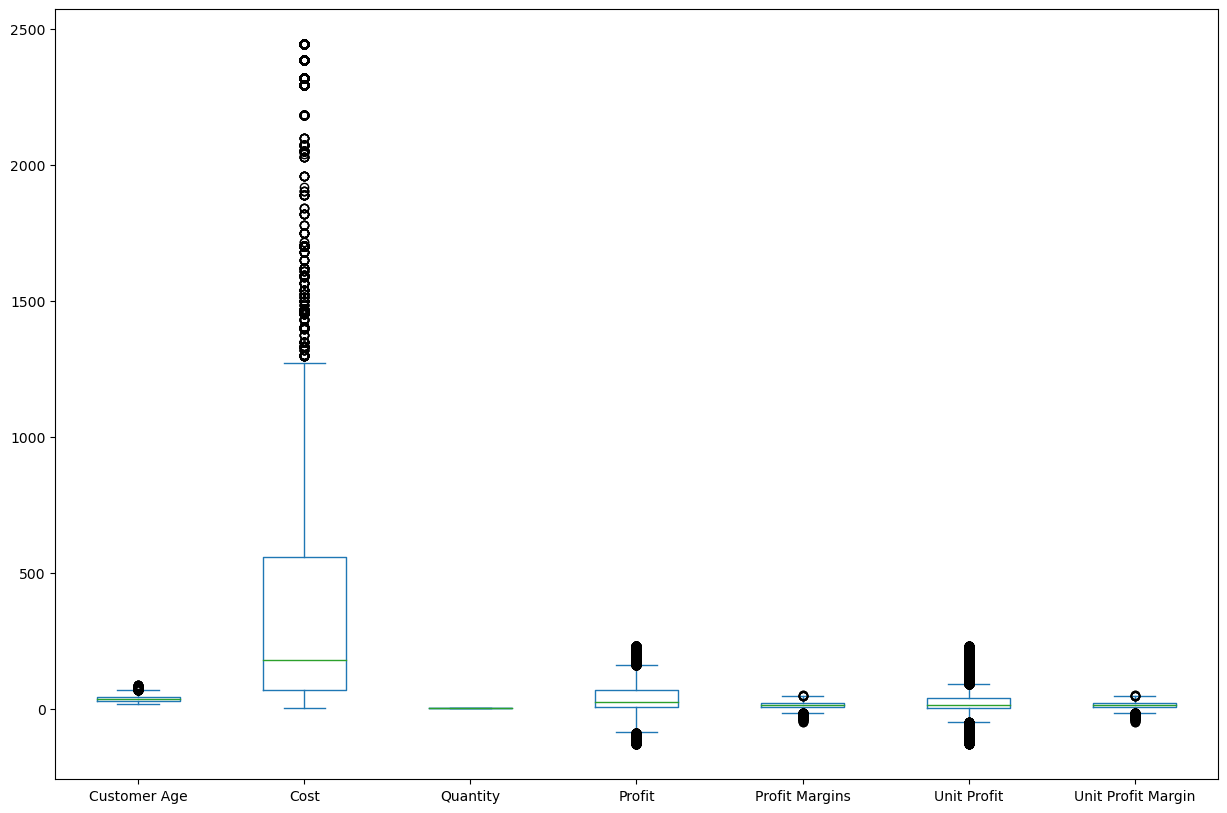

In [37]:
# Calculate the IQR for the Mortgage feature
Q1 = df['Profit'].quantile(0.25)
Q3 = df['Profit'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers outside the bounds
df_no_outliers = df[(df['Profit'] >= lower_bound) & (df['Profit'] <= upper_bound)]

# Plot boxplots of the numerical features again
df_no_outliers[desc_cols].plot(kind='box', figsize=(15,10))
plt.show()

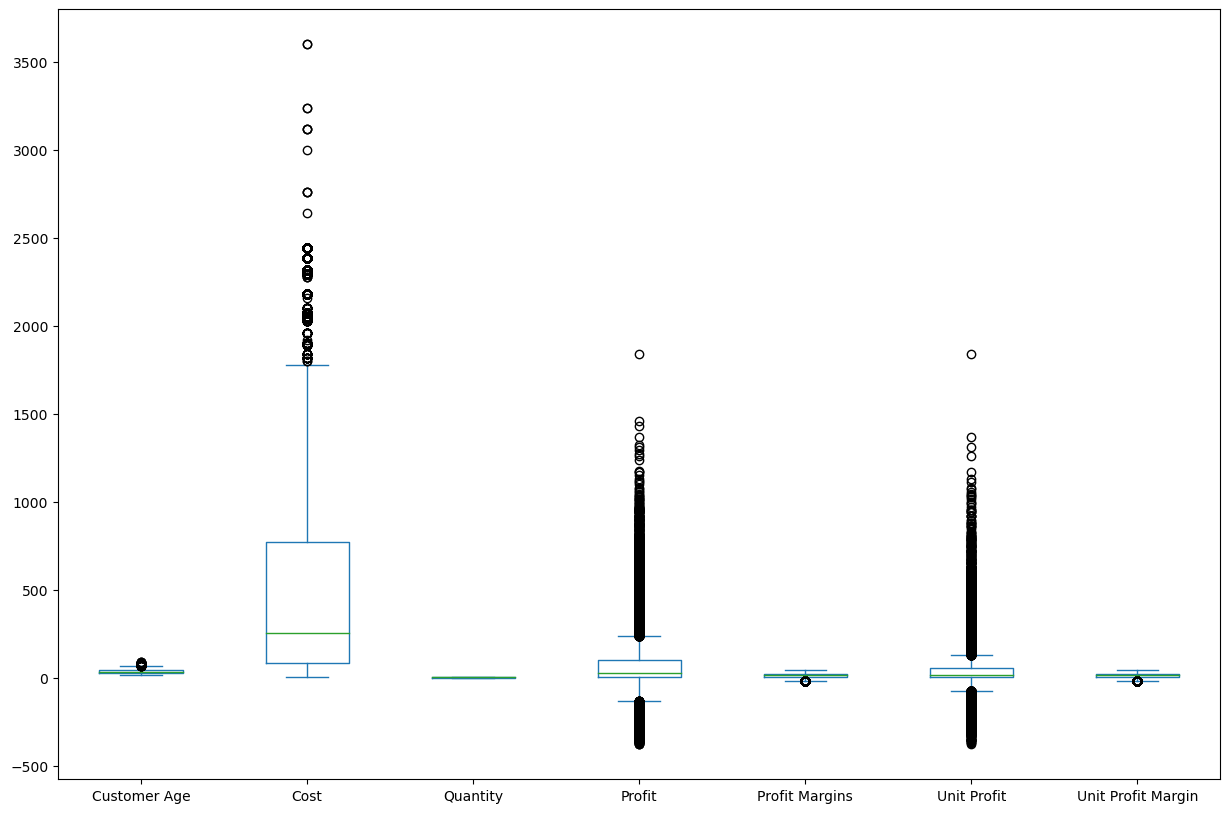

In [38]:
# Calculate the IQR for the Mortgage feature
Q1 = df['Profit Margins'].quantile(0.25)
Q3 = df['Profit Margins'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers outside the bounds
df_no_outliers = df[(df['Profit Margins'] >= lower_bound) & (df['Profit Margins'] <= upper_bound)]

# Plot boxplots of the numerical features again
df_no_outliers[desc_cols].plot(kind='box', figsize=(15,10))
plt.show()

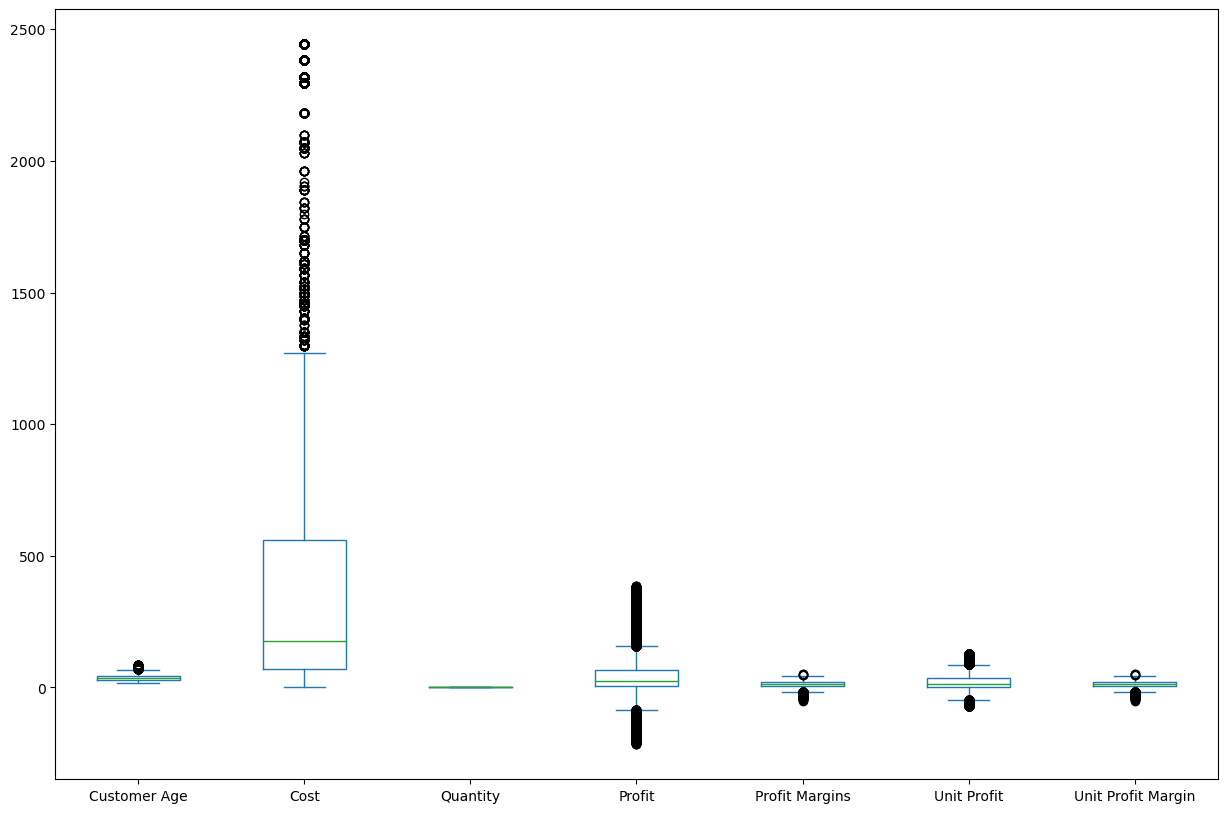

In [39]:
# Calculate the IQR for the Mortgage feature
Q1 = df['Unit Profit'].quantile(0.25)
Q3 = df['Unit Profit'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers outside the bounds
df_no_outliers = df[(df['Unit Profit'] >= lower_bound) & (df['Unit Profit'] <= upper_bound)]

# Plot boxplots of the numerical features again
df_no_outliers[desc_cols].plot(kind='box', figsize=(15,10))
plt.show()

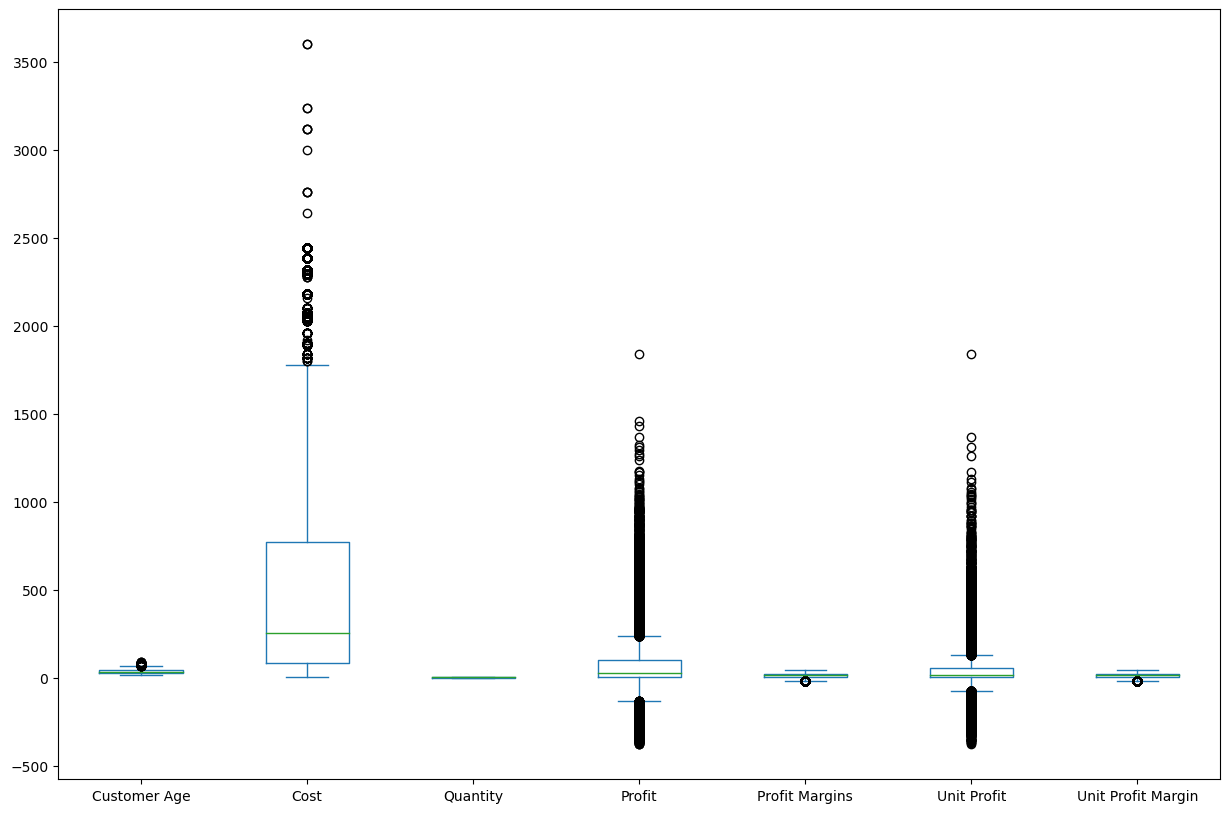

In [40]:
# Calculate the IQR for the Mortgage feature
Q1 = df['Unit Profit Margin'].quantile(0.25)
Q3 = df['Unit Profit Margin'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers outside the bounds
df_no_outliers = df[(df['Unit Profit Margin'] >= lower_bound) & (df['Unit Profit Margin'] <= upper_bound)]

# Plot boxplots of the numerical features again
df_no_outliers[desc_cols].plot(kind='box', figsize=(15,10))
plt.show()

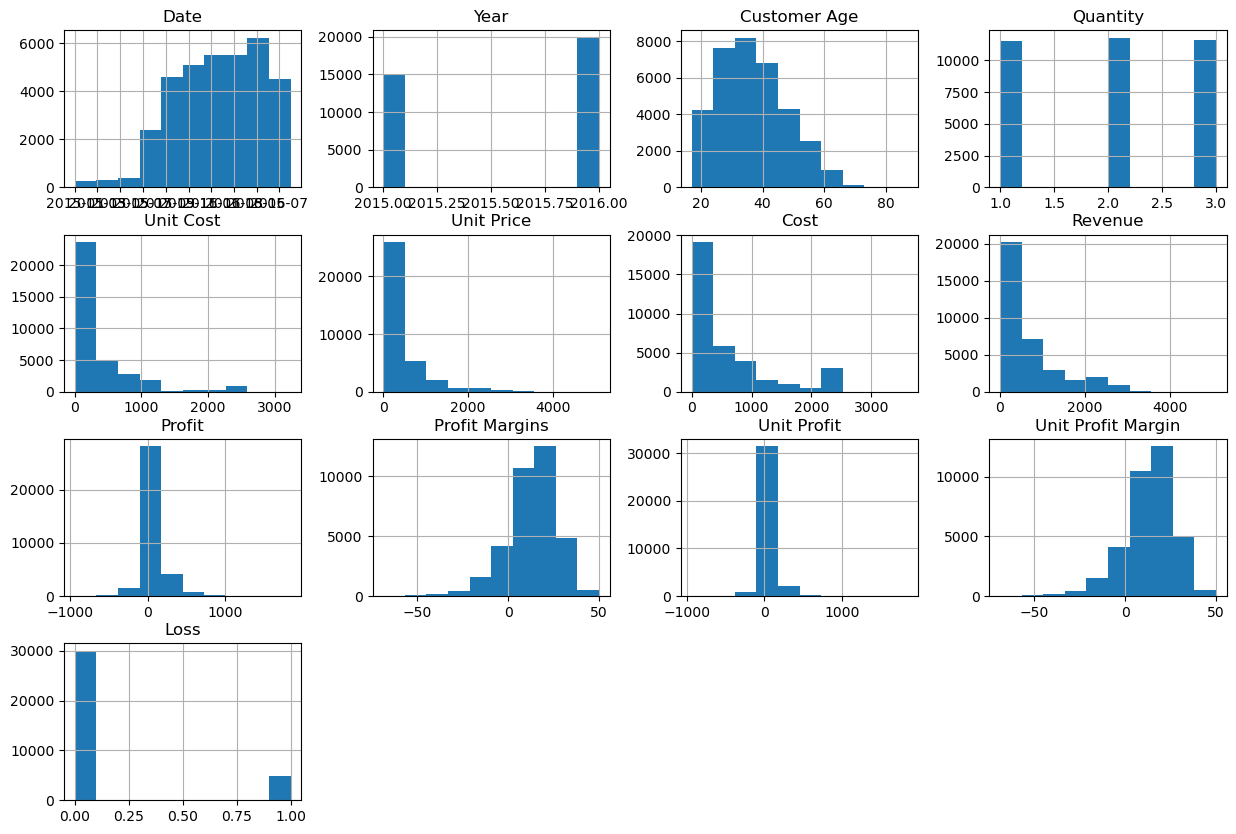

In [41]:
# Distribution of numerical columns
df.hist(figsize=(15, 10))
plt.show()

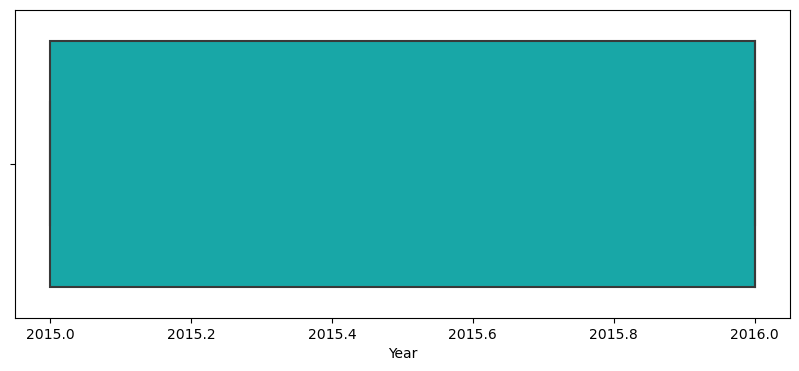

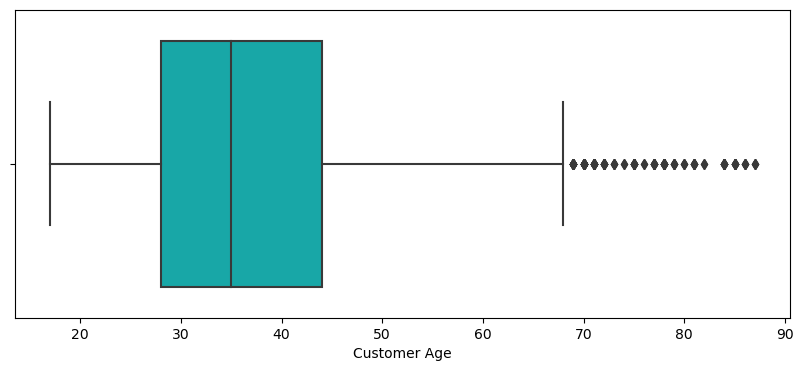

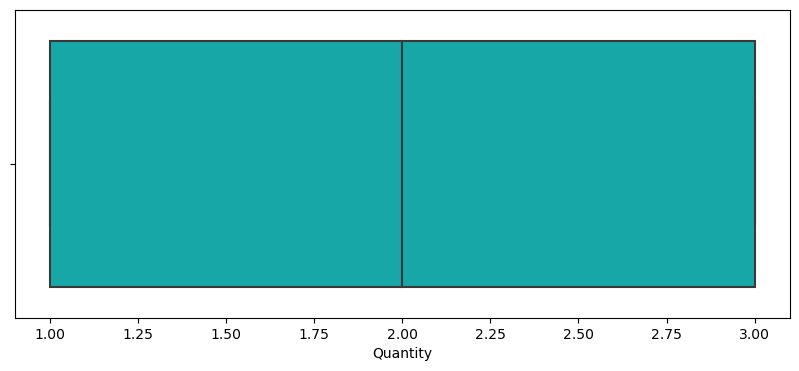

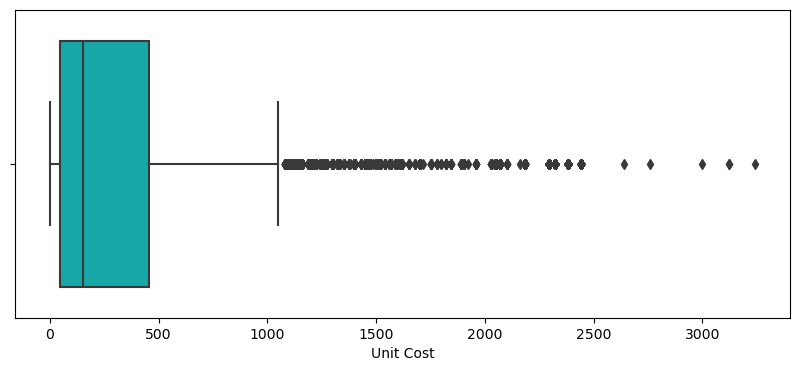

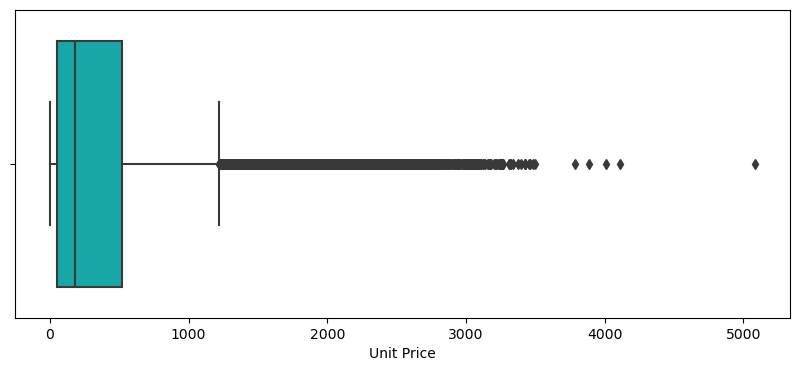

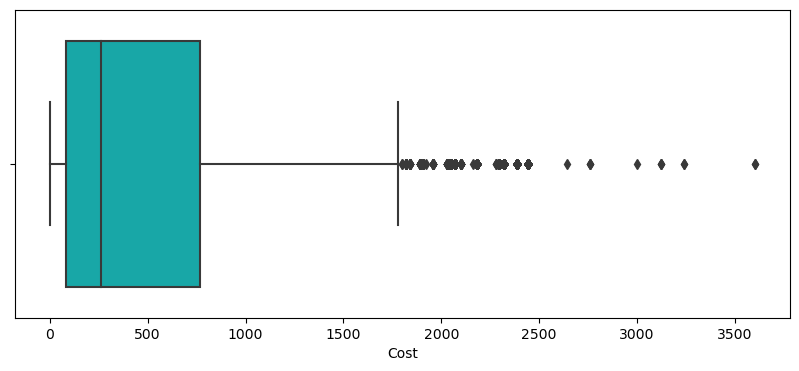

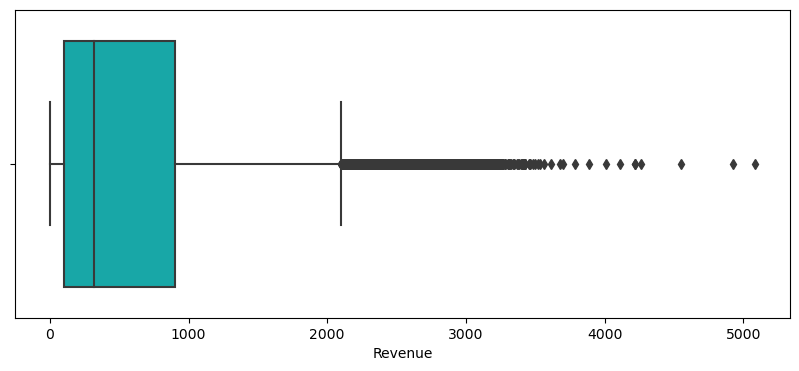

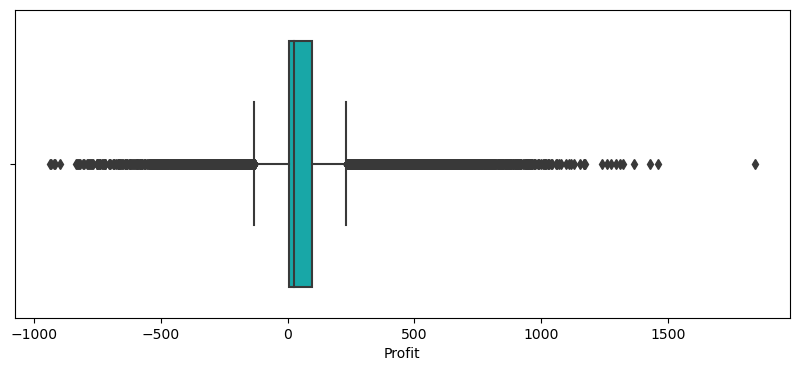

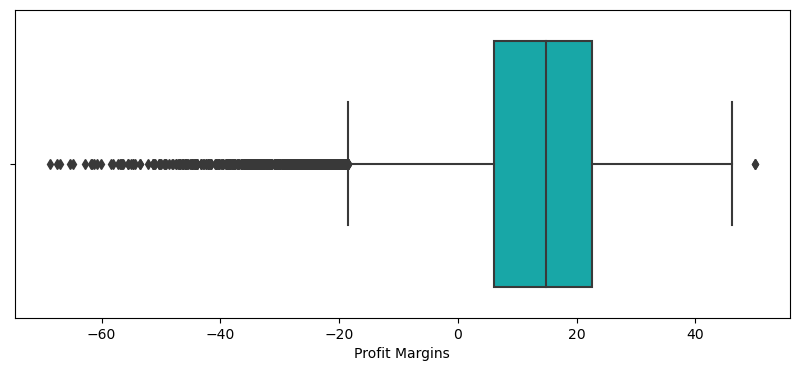

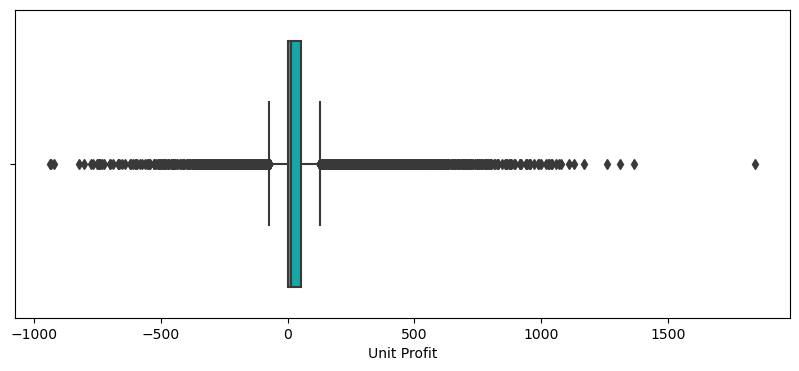

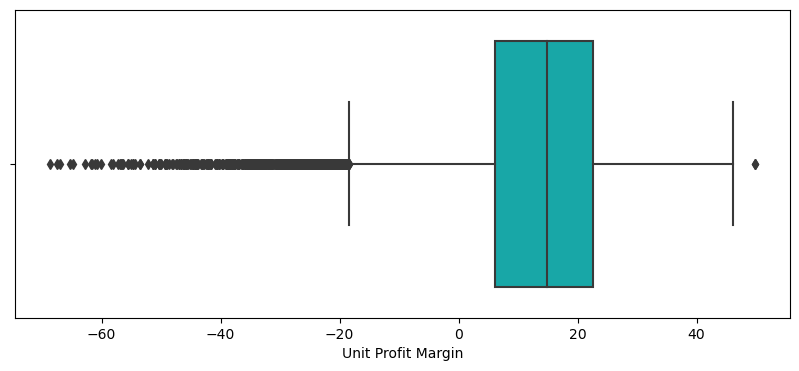

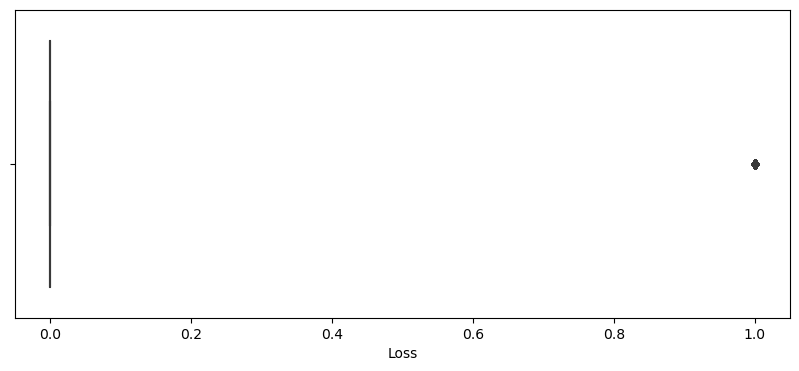

In [42]:
# Boxplots for numerical columns
for col in df.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10,4))
    sns.boxplot(df[col], color='c')
    plt.show()

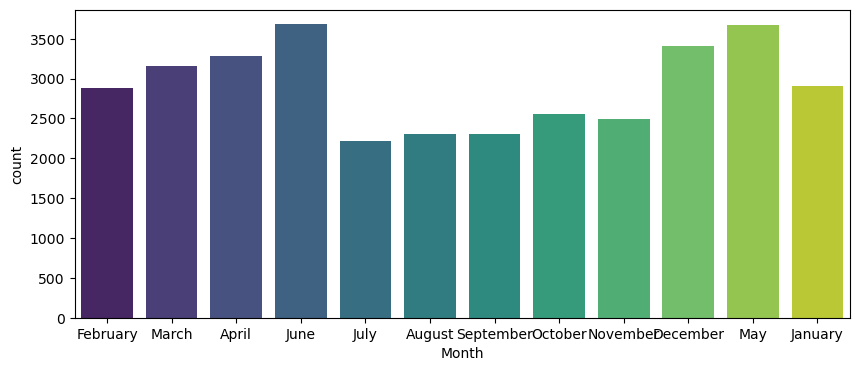

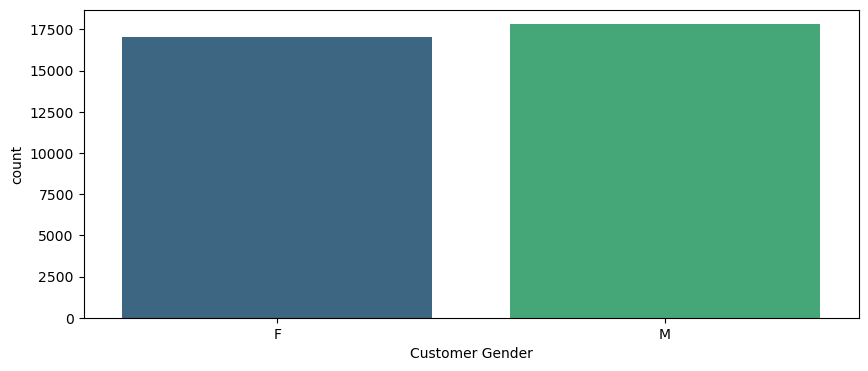

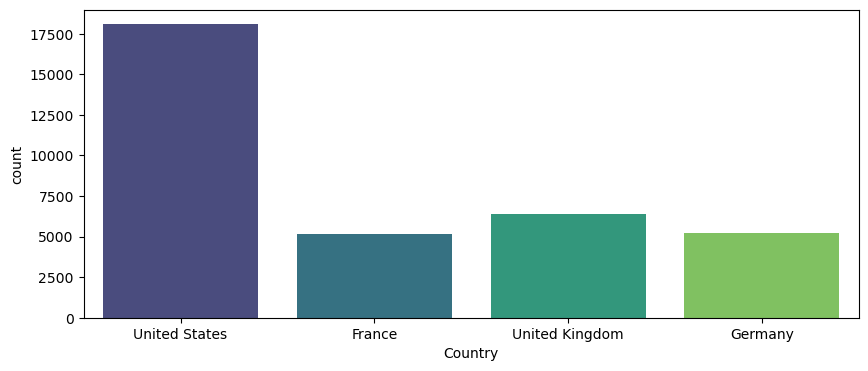

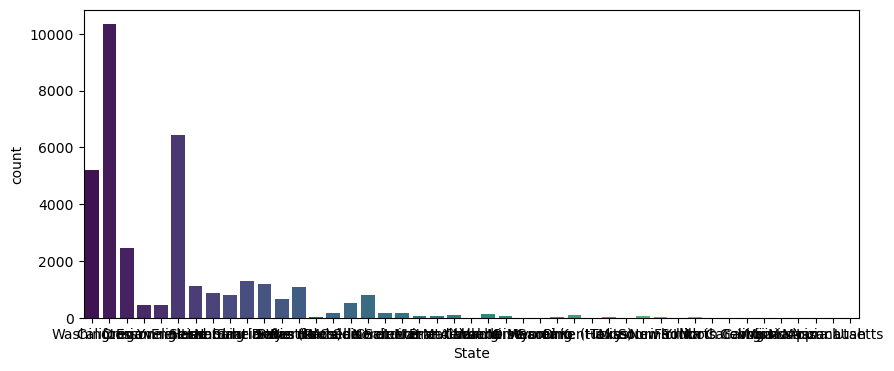

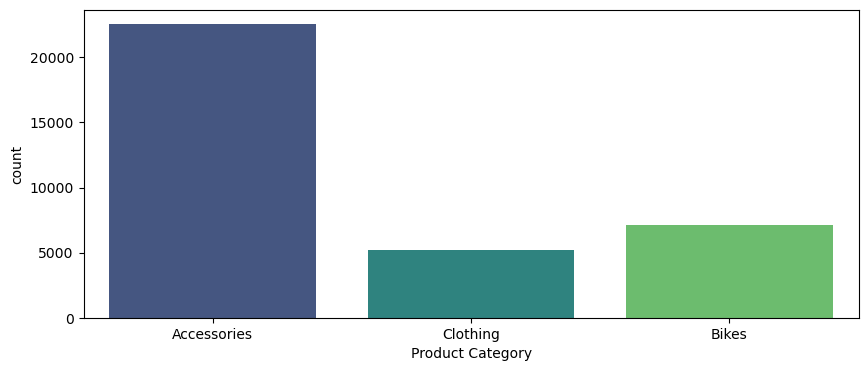

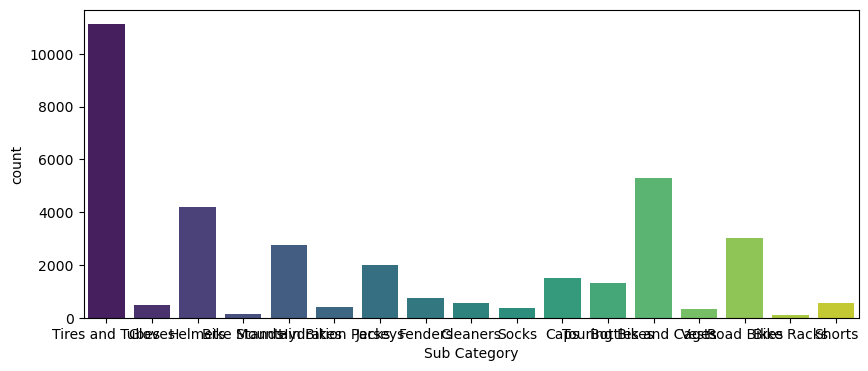

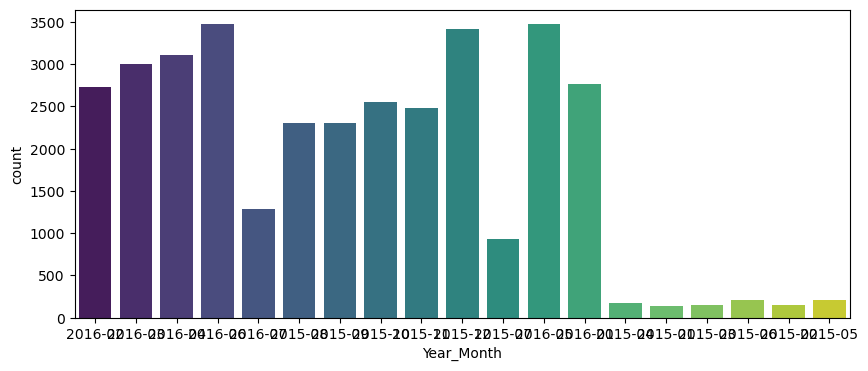

In [43]:
# Distribution of categorical columns
for col in df.select_dtypes(include=['object']).columns:
    plt.figure(figsize=(10,4))
    sns.countplot(df[col], palette='viridis')
    plt.show()

In [44]:
# Analyzing sales trends over time
#df.set_index('Date', inplace=True)
#df.groupby(pd.Grouper(freq='M')).agg({'Revenue': 'sum'}).plot(figsize=(10, 6))
#plt.show()

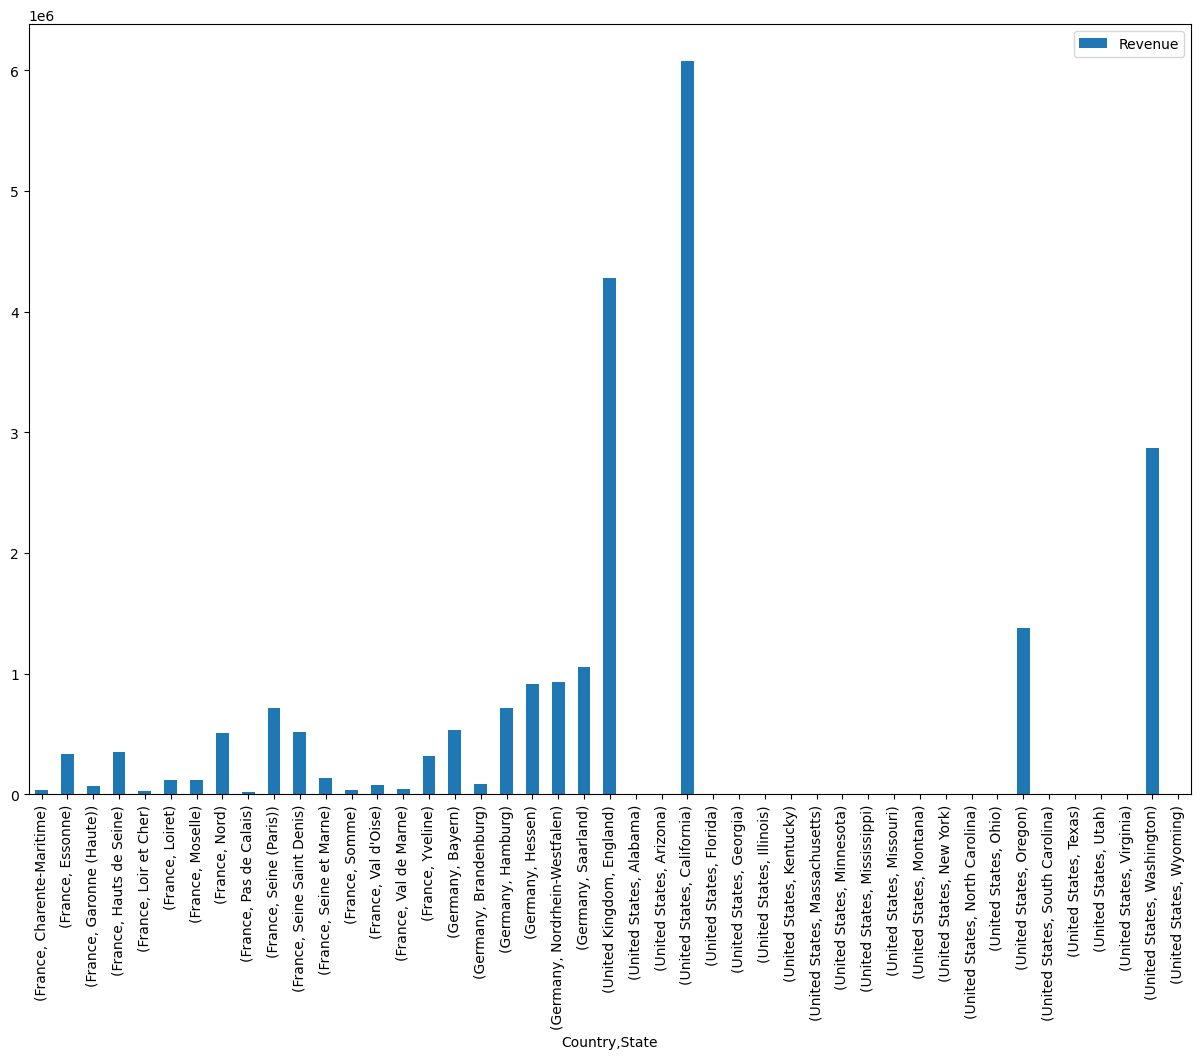

In [45]:
# Analyzing sales by country and state
df.groupby(['Country', 'State']).agg({'Revenue': 'sum'}).plot(kind='bar', figsize=(15, 10))
plt.show()

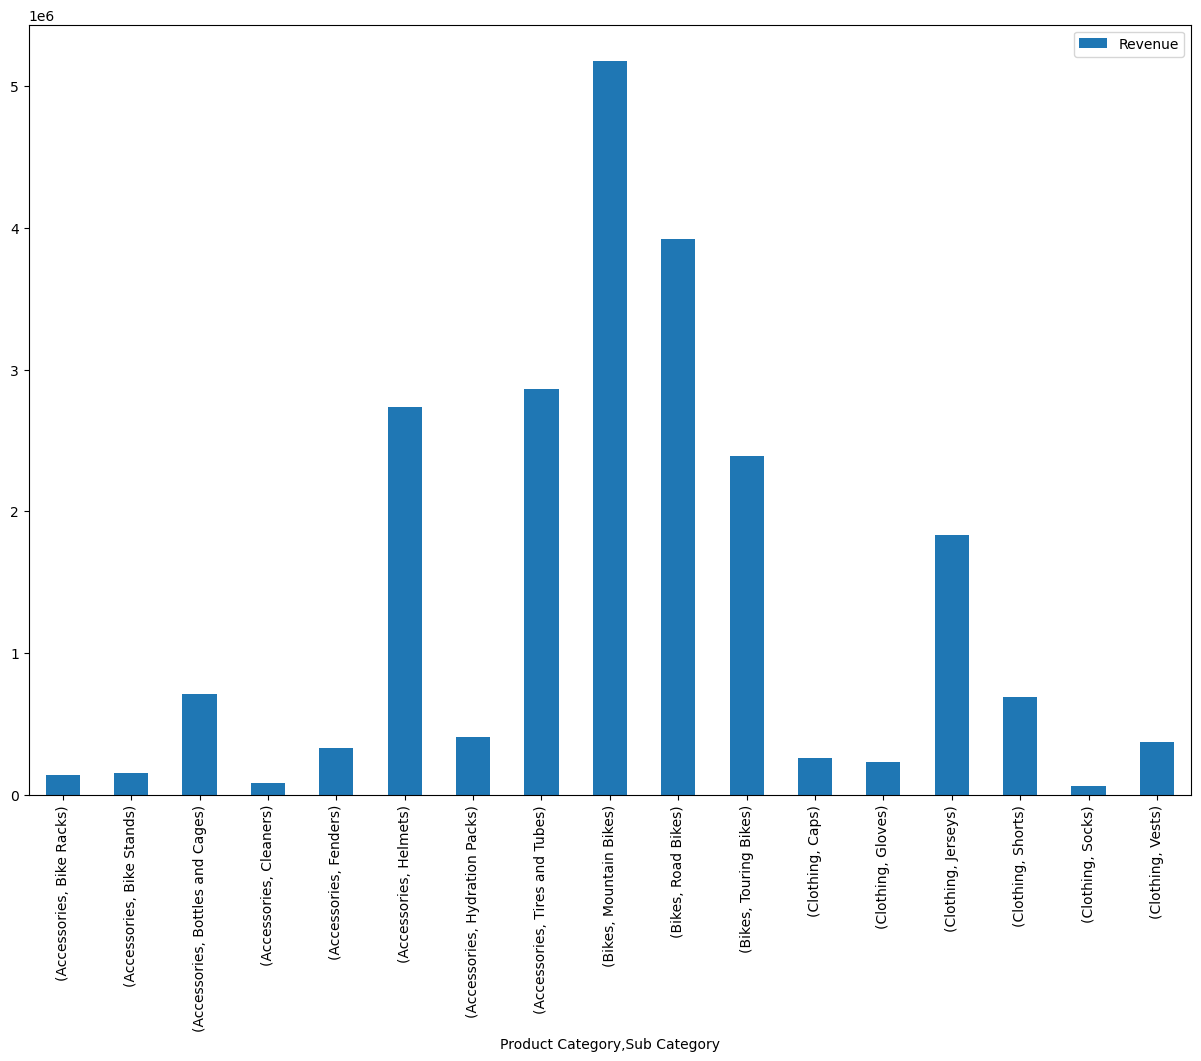

In [46]:
# Analyzing sales by product category and subcategory
df.groupby(['Product Category', 'Sub Category']).agg({'Revenue': 'sum'}).plot(kind='bar', figsize=(15, 10))
plt.show()

In [47]:
# Compute summary statistics of the numerical features
summary = X_x[desc_cols].describe()
print(summary)

# Compute pairwise correlations between the numerical features
corr_matrix = X_x[desc_cols].corr()
print(corr_matrix)

       Customer Age          Cost      Quantity        Profit  Profit Margins  \
count  34865.000000  34865.000000  34865.000000  34865.000000    34865.000000   
mean      36.382705    576.020479      2.002524     64.867173       13.407121   
std       11.113005    690.503877      0.813948    152.881797       13.544420   
min       17.000000      2.000000      1.000000   -937.000000      -68.670000   
25%       28.000000     85.000000      1.000000      5.000000        6.170000   
50%       35.000000    261.000000      2.000000     27.000000       14.800000   
75%       44.000000    769.000000      3.000000     96.000000       22.570000   
max       87.000000   3600.000000      3.000000   1842.000000       50.000000   

        Unit Profit  Unit Profit Margin  
count  34865.000000        34865.000000  
mean      39.352933           13.406658  
std      104.936259           13.544251  
min     -937.000000          -68.670000  
25%        3.000000            6.170000  
50%       14.50000

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34865 entries, 0 to 34865
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                34865 non-null  datetime64[ns]
 1   Year                34865 non-null  int64         
 2   Month               34865 non-null  object        
 3   Customer Age        34865 non-null  int32         
 4   Customer Gender     34865 non-null  object        
 5   Country             34865 non-null  object        
 6   State               34865 non-null  object        
 7   Product Category    34865 non-null  object        
 8   Sub Category        34865 non-null  object        
 9   Quantity            34865 non-null  int32         
 10  Unit Cost           34865 non-null  float64       
 11  Unit Price          34865 non-null  float64       
 12  Cost                34865 non-null  float64       
 13  Revenue             34865 non-null  float64   

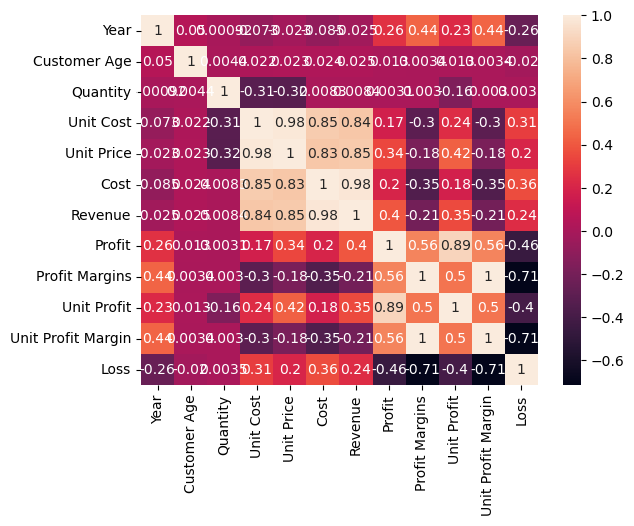

In [49]:
# Analyzing correlation between numeric columns
sns.heatmap(df.corr(), annot=True)
plt.show()

In [50]:
# Extract the top N correlations
N = 5
correlations = corr_matrix.unstack().sort_values(ascending=False)
correlations = correlations[correlations != 1]  # exclude correlations of features with themselves
correlations = correlations[~correlations.index.duplicated(keep='first')]  # exclude duplicate correlations
top_N_correlations = correlations[:N]
print('Top', N, 'correlations:\n', top_N_correlations)

Top 5 correlations:
 Unit Profit Margin  Profit Margins        0.999999
Profit Margins      Unit Profit Margin    0.999999
Profit              Unit Profit           0.893362
Unit Profit         Profit                0.893362
Unit Profit Margin  Profit                0.563852
dtype: float64


In [51]:
# analyzing sales trends based on age over time

age_sales = df.groupby('age_groups')['Revenue'].sum()
print(age_sales)

age_groups
<18        373717.0
18-29     6674804.0
30-49    12676913.0
50-90     2619114.0
Name: Revenue, dtype: float64


In [52]:
# Grouping data by customer gender and analyzing revenue
gender_sales = df.groupby('Customer Gender')['Revenue'].sum()
print(gender_sales)

Customer Gender
F    10932606.0
M    11411942.0
Name: Revenue, dtype: float64


In [53]:
# Grouping data by product category and analyzing sales trends
category_sales = df.groupby('Product Category')['Revenue'].sum()
print(category_sales)

Product Category
Accessories     7420636.0
Bikes          11486355.0
Clothing        3437557.0
Name: Revenue, dtype: float64


In [54]:
# Grouping data by location and analyzing sales trends
location_sales = df.groupby(['Country', 'State'])['Revenue'].sum()
print(location_sales)

Country         State              
France          Charente-Maritime        37867.0
                Essonne                 337567.0
                Garonne (Haute)          69687.0
                Hauts de Seine          350065.0
                Loir et Cher             31587.0
                Loiret                  118555.0
                Moselle                 120770.0
                Nord                    512872.0
                Pas de Calais            23038.0
                Seine (Paris)           719148.0
                Seine Saint Denis       520378.0
                Seine et Marne          132927.0
                Somme                    36036.0
                Val d'Oise               76242.0
                Val de Marne             42815.0
                Yveline                 316550.0
Germany         Bayern                  537380.0
                Brandenburg              88438.0
                Hamburg                 714036.0
                Hessen           

# STATISTICAL ANALYSIS

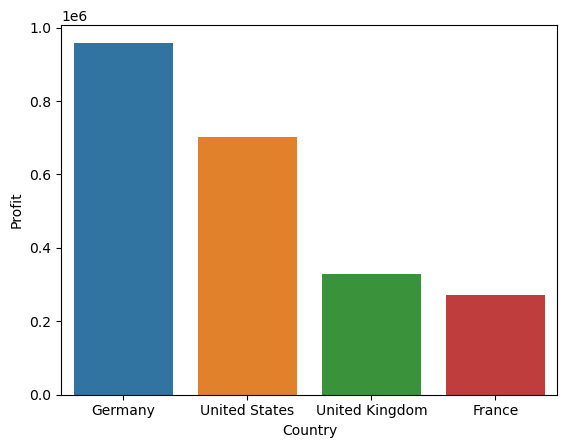

In [55]:
#Plot profit according to countries.
country_profit = df.groupby('Country')['Profit'].sum().reset_index().sort_values('Profit',ascending=False).reset_index(drop=True)
sns.barplot(data=country_profit,x='Country',y='Profit');

Is this profit in difference statistically significant?

**Verify conditions to apply ANOVA**

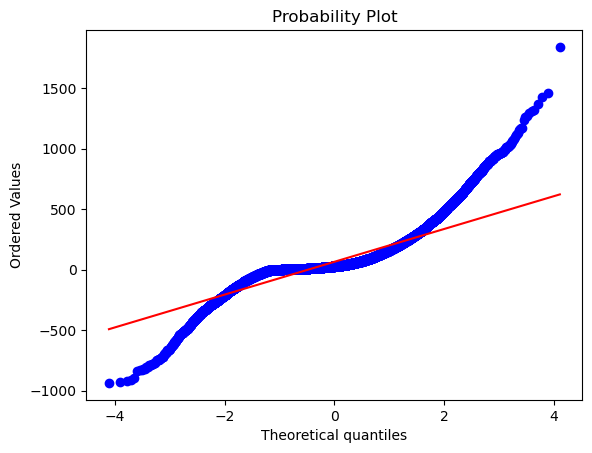

<Figure size 640x480 with 0 Axes>

In [56]:
#Check for normality of "Profit" using a probability plot. 
stats.probplot(df.Profit, plot=plt)
plt.figure();

Check for normality using Shapiro test on each country

In [57]:
stats.shapiro(df.Profit[df.Country == "Germany"])

ShapiroResult(statistic=0.8072816729545593, pvalue=0.0)

In [58]:
stats.shapiro(df.Profit[df.Country == "United States"])

ShapiroResult(statistic=0.8241831064224243, pvalue=0.0)

In [59]:
stats.shapiro(df.Profit[df.Country == "United Kingdom"])

ShapiroResult(statistic=0.8605695962905884, pvalue=0.0)

In [60]:
stats.shapiro(df.Profit[df.Country == "France"])

ShapiroResult(statistic=0.8456968069076538, pvalue=0.0)

In any group the variable "Profit" is normally distributes. Cannot use ANOVA. Considering using Kruskal-Wallis test instead.

In [61]:
# create a list of arrays for each category
Ger = df.loc[df['Country'] == 'Germany', 'Profit']
US = df.loc[df['Country'] == 'United States', 'Profit']
UK = df.loc[df['Country'] == 'United Kingdom', 'Profit']
Fr = df.loc[df['Country'] == 'France', 'Profit']

# perform Kruskal-Wallis test
statistic, p_value = stats.kruskal(Ger, US, UK, Fr)

# print results
print("Kruskal-Wallis Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Kruskal-Wallis Test
Statistic: 3707.6006098072203
p-value: 0.0


We can reject the null hypothesis so there is a significant difference.

**Check whether there is a statistically significative difference in profit according to age groups**

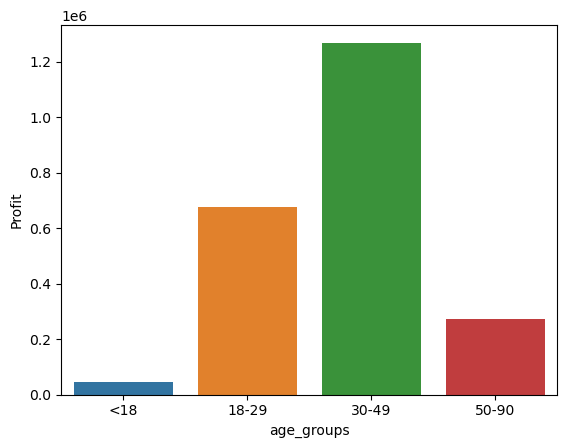

In [62]:
#Plot profit according to age groups
age_group_profit = df.groupby('age_groups')['Profit'].sum().reset_index().sort_values('Profit',ascending=False).reset_index(drop=True)
sns.barplot(data=age_group_profit,x='age_groups',y='Profit');

In [63]:
#Check for normality using Shapiro test to see if it possible to use ANOVA
stats.shapiro(df.Profit[df.age_groups == "30-49"]) #Have to reject the null hypothesis so cannot assume normality. 

ShapiroResult(statistic=0.7923343181610107, pvalue=0.0)

Applying Kruskal-Wallis Test

In [64]:
# create a list of arrays for each category
less_18 = df.loc[df['age_groups'] == '<18', 'Profit']
age18_29= df.loc[df['age_groups'] == '18-29', 'Profit']
age30_49= df.loc[df['age_groups'] == '30-49', 'Profit']
age50_90= df.loc[df['age_groups'] == '50-90', 'Profit']

# perform Kruskal-Wallis test
statistic, p_value = stats.kruskal(less_18, age18_29, age30_49, age50_90)

# print results
print("Kruskal-Wallis Test")
print("Statistic:", statistic)
print("p-value:", p_value)

Kruskal-Wallis Test
Statistic: 30.000708190026792
p-value: 1.3795837395311145e-06


We cannot reject the null hypothesis, no statistically significant difference in profit per age groups. 

In [65]:
from scipy.stats import chi2_contingency

In [66]:
contingency_table = pd.crosstab(df['Country'], df['Loss'])

# Run Pearson's chi-square test using chi2_contingency()
chi2_stat, p_val, dof, expected_counts = chi2_contingency(contingency_table)

# Print results
print('Chi-square test statistic:', chi2_stat)
print('Degrees of freedom:', dof)
print('P-value:', p_val)
print('Expected counts:', expected_counts)

Chi-square test statistic: 1968.460947070664
Degrees of freedom: 3
P-value: 0.0
Expected counts: [[ 4448.49700272   719.50299728]
 [ 4476.04187581   723.95812419]
 [ 5527.05093934   893.94906066]
 [15559.41018213  2516.58981787]]


In [67]:
contingency_table

Loss,0,1
Country,,
France,3614,1554
Germany,5197,3
United Kingdom,5613,808
United States,15587,2489


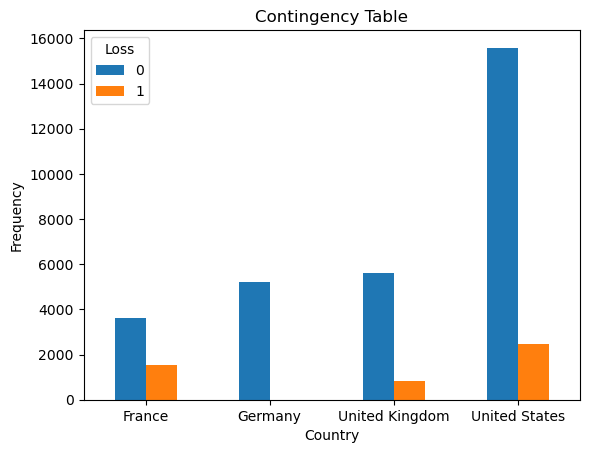

In [68]:
contingency_table.plot(kind='bar', stacked=False)
plt.title('Contingency Table')
plt.xlabel('Country')
plt.ylabel('Frequency')
plt.xticks(rotation = 0);


In [69]:
contingency_table2 = pd.crosstab(df['Product Category'], df['Loss'])

# Run Pearson's chi-square test using chi2_contingency()
chi2_stat2, p_val2, dof2, expected_counts2 = chi2_contingency(contingency_table2)

# Print results
print('Chi-square test statistic:', chi2_stat2)
print('Degrees of freedom:', dof2)
print('P-value:', p_val2)
print('Expected counts:', expected_counts2)

Chi-square test statistic: 7910.2594086657045
Degrees of freedom: 2
P-value: 0.0
Expected counts: [[19395.89453607  3137.10546393]
 [ 6105.49327406   987.50672594]
 [ 4509.61218988   729.38781012]]


In [70]:
contingency_table2

Loss,0,1
Product Category,,
Accessories,21495,1038
Bikes,3807,3286
Clothing,4709,530


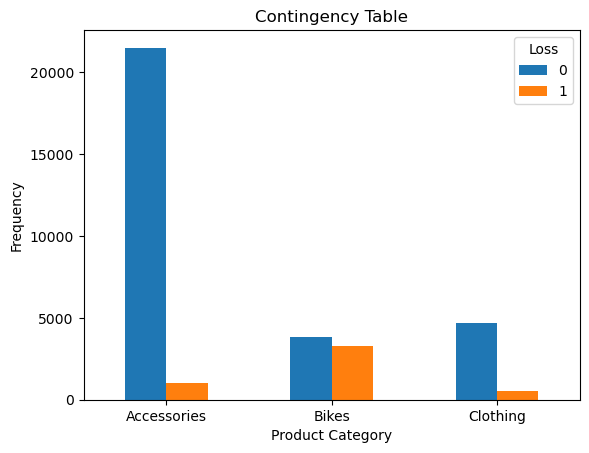

In [71]:
contingency_table2.plot(kind='bar', stacked=False)
plt.title('Contingency Table')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation = 0);

In [72]:
contingency_table3 = pd.crosstab(df['Product Category'], df['Customer Gender'])

# Run Pearson's chi-square test using chi2_contingency()
chi2_stat3, p_val3, dof3, expected_counts3 = chi2_contingency(contingency_table3)

# Print results
print('Chi-square test statistic:', chi2_stat3)
print('Degrees of freedom:', dof3)
print('P-value:', p_val3)
print('Expected counts:', expected_counts3)

Chi-square test statistic: 3.714633591407757
Degrees of freedom: 2
P-value: 0.15609089272932877
Expected counts: [[11025.75591567 11507.24408433]
 [ 3470.71791195  3622.28208805]
 [ 2563.52617238  2675.47382762]]


In [73]:
contingency_table3

Customer Gender,F,M
Product Category,,
Accessories,11041,11492
Bikes,3514,3579
Clothing,2505,2734


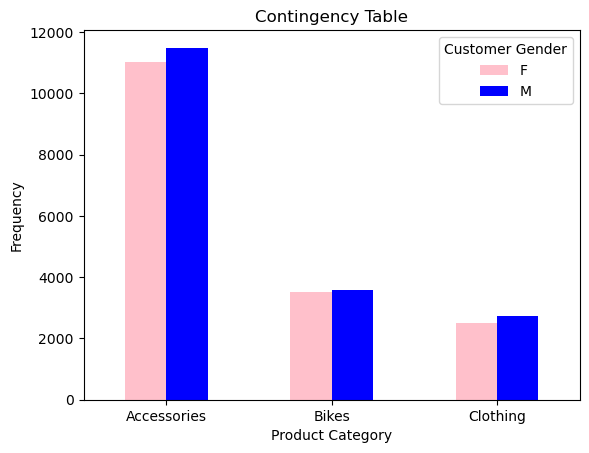

In [74]:
colors = sns.color_palette(['pink', 'blue'])
contingency_table3.plot(kind='bar', stacked=False, color=colors)

plt.title('Contingency Table')
plt.xlabel('Product Category')
plt.ylabel('Frequency')
plt.xticks(rotation = 0);

# PCA

In [75]:
from sklearn.decomposition import PCA

In [76]:
print(df.columns)

Index(['Date', 'Year', 'Month', 'Customer Age', 'Customer Gender', 'Country',
       'State', 'Product Category', 'Sub Category', 'Quantity', 'Unit Cost',
       'Unit Price', 'Cost', 'Revenue', 'Year_Month', 'Profit',
       'Profit Margins', 'Unit Profit', 'Unit Profit Margin', 'Loss',
       'age_groups'],
      dtype='object')


### Drop columns and encode with dummy encoder

In [77]:
#Drop y and all other features that are collinear with each other and can be infered by other independent features.
X_pca =df.drop(['Loss','Date','Customer Age','Year_Month', 'Profit', 'Profit Margins', 'Unit Profit','Unit Profit Margin', 'Cost'], axis=1) 
X_dum  = pd.get_dummies(X_pca, drop_first = True)

In [78]:
X_dum.head()

,Year,Quantity,Unit Cost,Unit Price,Revenue,Month_August,Month_December,Month_February,Month_January,Month_July,...,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests,age_groups_18-29,age_groups_30-49,age_groups_50-90
0,2016,1,80.00,109.000000,109.0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
1,2016,2,24.50,28.500000,57.0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2016,3,3.67,5.000000,15.0,0,0,1,0,0,...,0,0,0,0,1,0,0,1,0,0
3,2016,2,87.50,116.500000,233.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,2016,3,35.00,41.666667,125.0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


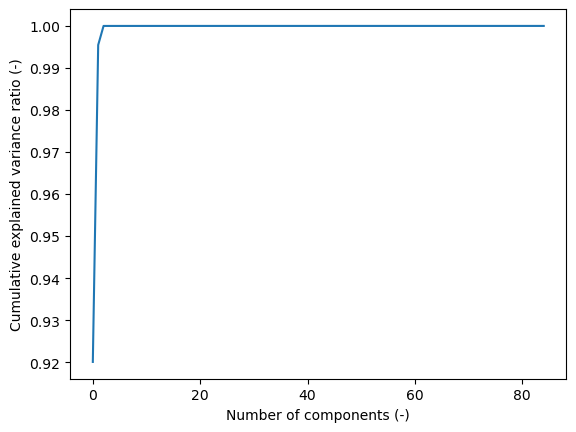

In [79]:
pca = PCA().fit(X_dum)
plt.plot(np.cumsum(pca.explained_variance_ratio_), )

plt.ylabel('Cumulative explained variance ratio (-)')
plt.xlabel('Number of components (-)');


- This graph sugest thats only approx 2 components are responsible for a cumulative ratio of 95.0 %. 
- It may be necessary to scale/standardise the data 

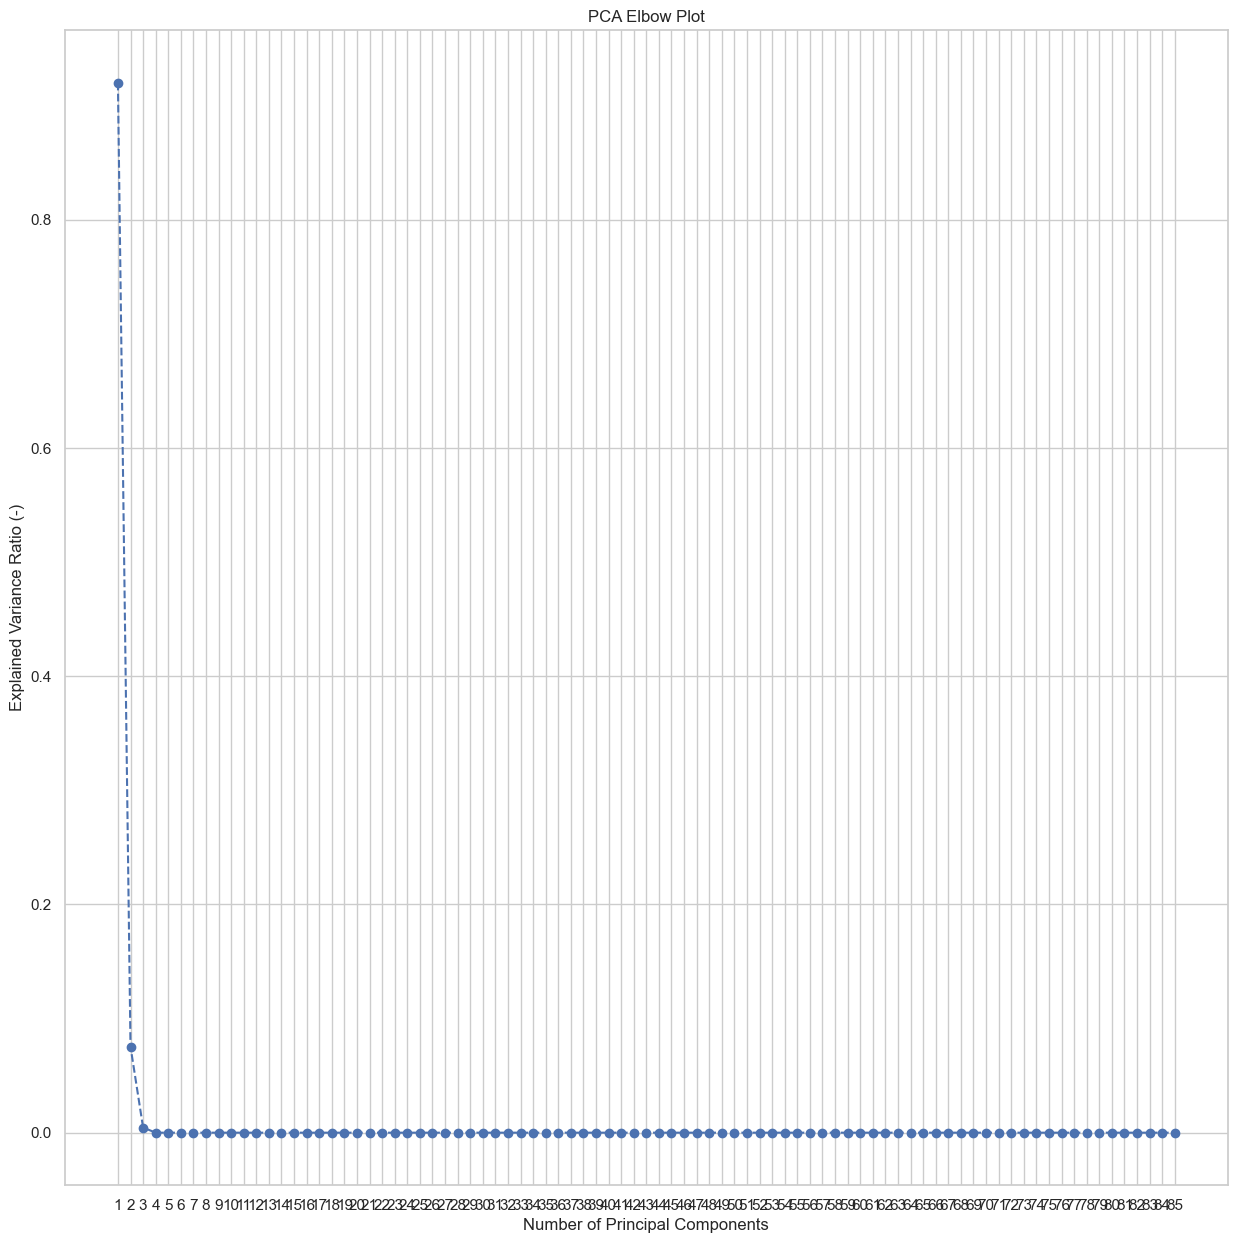

In [80]:
plt.figure(figsize=(15,15))
sns.set(style='whitegrid')

plt.plot(range(1, len(pca.explained_variance_ratio_) + 1),
        pca.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio (-)')
plt.title('PCA Elbow Plot')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show();

- Elbow plot suggest only 2 components affecting 
- Data needs to be standardised due to the nature of the data to determine what the actual affect is 

### Scaling - min/max  & std. dev

In [81]:
from sklearn.preprocessing import StandardScaler
import sklearn.preprocessing as preproc 

In [82]:
scaler = preproc.StandardScaler()
d = scaler.fit_transform(X_dum)
X_scaled = pd.DataFrame(d, columns=X_dum.columns)

#all standard deviations are 1
X_scaled.head()

,Year,Quantity,Unit Cost,Unit Price,Revenue,Month_August,Month_December,Month_February,Month_January,Month_July,...,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests,age_groups_18-29,age_groups_30-49,age_groups_50-90
0,0.869879,-1.231699,-0.550783,-0.533476,-0.722042,-0.265945,-0.329469,3.328145,-0.301601,-0.260463,...,-0.291874,-0.308063,-0.12846,-0.102715,1.462053,-0.199459,-0.095024,1.469716,-1.079036,-0.373485
1,0.869879,-0.003101,-0.664045,-0.686718,-0.792633,-0.265945,-0.329469,3.328145,-0.301601,-0.260463,...,-0.291874,-0.308063,-0.12846,-0.102715,-0.683970,-0.199459,-0.095024,1.469716,-1.079036,-0.373485
2,0.869879,1.225497,-0.706554,-0.731453,-0.849648,-0.265945,-0.329469,3.328145,-0.301601,-0.260463,...,-0.291874,-0.308063,-0.12846,-0.102715,1.462053,-0.199459,-0.095024,1.469716,-1.079036,-0.373485
3,0.869879,-0.003101,-0.535477,-0.519199,-0.553711,-0.265945,-0.329469,-0.300468,-0.301601,-0.260463,...,-0.291874,-0.308063,-0.12846,-0.102715,1.462053,-0.199459,-0.095024,1.469716,-1.079036,-0.373485
4,0.869879,1.225497,-0.642617,-0.661653,-0.700322,-0.265945,-0.329469,-0.300468,-0.301601,-0.260463,...,-0.291874,-0.308063,-0.12846,-0.102715,1.462053,-0.199459,-0.095024,1.469716,-1.079036,-0.373485


In [83]:
X_scaled.describe()

,Year,Quantity,Unit Cost,Unit Price,Revenue,Month_August,Month_December,Month_February,Month_January,Month_July,...,Sub Category_Mountain Bikes,Sub Category_Road Bikes,Sub Category_Shorts,Sub Category_Socks,Sub Category_Tires and Tubes,Sub Category_Touring Bikes,Sub Category_Vests,age_groups_18-29,age_groups_30-49,age_groups_50-90
count,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04,...,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04,3.486500e+04
mean,-1.030732e-13,-7.209619e-16,-2.698544e-16,7.639888e-17,-3.860067e-17,-1.904100e-15,-3.996484e-16,4.993854e-16,-4.775672e-15,2.834634e-15,...,6.077415e-14,-5.078259e-15,-5.671046e-15,2.367635e-15,2.019227e-15,-1.708207e-14,4.190125e-15,7.363563e-15,2.072533e-15,7.675537e-15
std,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,...,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00,1.000014e+00
min,-1.149586e+00,-1.231699e+00,-7.126764e-01,-7.397017e-01,-8.672958e-01,-2.659448e-01,-3.294690e-01,-3.004677e-01,-3.016010e-01,-2.604625e-01,...,-2.918741e-01,-3.080635e-01,-1.284599e-01,-1.027152e-01,-6.839697e-01,-1.994595e-01,-9.502424e-02,-6.804035e-01,-1.079036e+00,-3.734847e-01
25%,-1.149586e+00,-1.231699e+00,-6.222093e-01,-6.388099e-01,-7.315449e-01,-2.659448e-01,-3.294690e-01,-3.004677e-01,-3.016010e-01,-2.604625e-01,...,-2.918741e-01,-3.080635e-01,-1.284599e-01,-1.027152e-01,-6.839697e-01,-1.994595e-01,-9.502424e-02,-6.804035e-01,-1.079036e+00,-3.734847e-01
50%,8.698785e-01,-3.101007e-03,-4.079290e-01,-4.002230e-01,-4.369654e-01,-2.659448e-01,-3.294690e-01,-3.004677e-01,-3.016010e-01,-2.604625e-01,...,-2.918741e-01,-3.080635e-01,-1.284599e-01,-1.027152e-01,-6.839697e-01,-1.994595e-01,-9.502424e-02,-6.804035e-01,9.267534e-01,-3.734847e-01
75%,8.698785e-01,1.225497e+00,2.145041e-01,2.508146e-01,3.544624e-01,-2.659448e-01,-3.294690e-01,-3.004677e-01,-3.016010e-01,-2.604625e-01,...,-2.918741e-01,-3.080635e-01,-1.284599e-01,-1.027152e-01,1.462053e+00,-1.994595e-01,-9.502424e-02,1.469716e+00,9.267534e-01,-3.734847e-01
max,8.698785e-01,1.225497e+00,5.898033e+00,8.933220e+00,6.028851e+00,3.760179e+00,3.035187e+00,3.328145e+00,3.315639e+00,3.839324e+00,...,3.426135e+00,3.246084e+00,7.784532e+00,9.735654e+00,1.462053e+00,5.013550e+00,1.052363e+01,1.469716e+00,9.267534e-01,2.677486e+00


- All standard deviations are roughly = 1.00

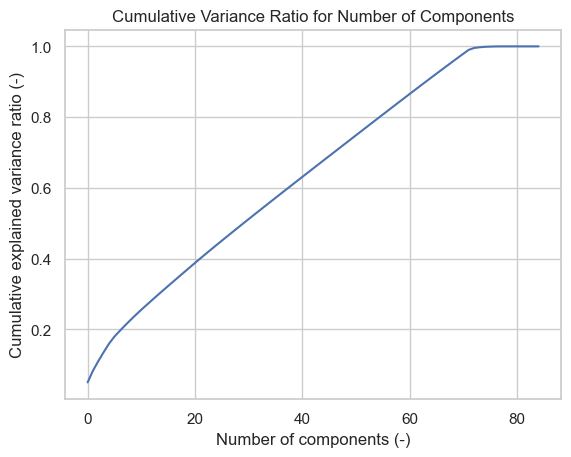

In [84]:
pca_s = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_s.explained_variance_ratio_), )

plt.ylabel('Cumulative explained variance ratio (-)')
plt.xlabel('Number of components (-)')
plt.title('Cumulative Variance Ratio for Number of Components');


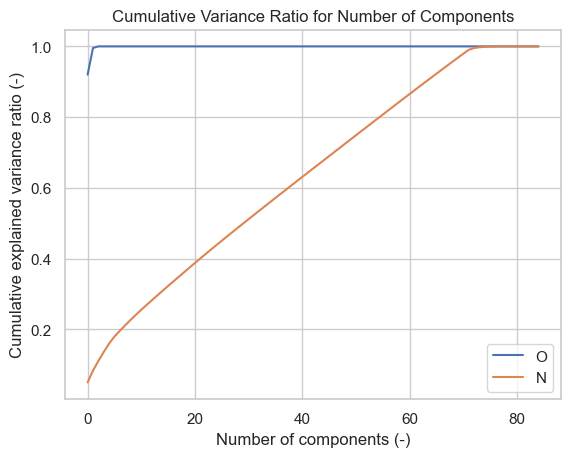

In [85]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.plot(np.cumsum(pca_s.explained_variance_ratio_))

plt.ylabel('Cumulative explained variance ratio (-)')
plt.xlabel('Number of components (-)')
plt.title('Cumulative Variance Ratio for Number of Components')
plt.legend('ON');

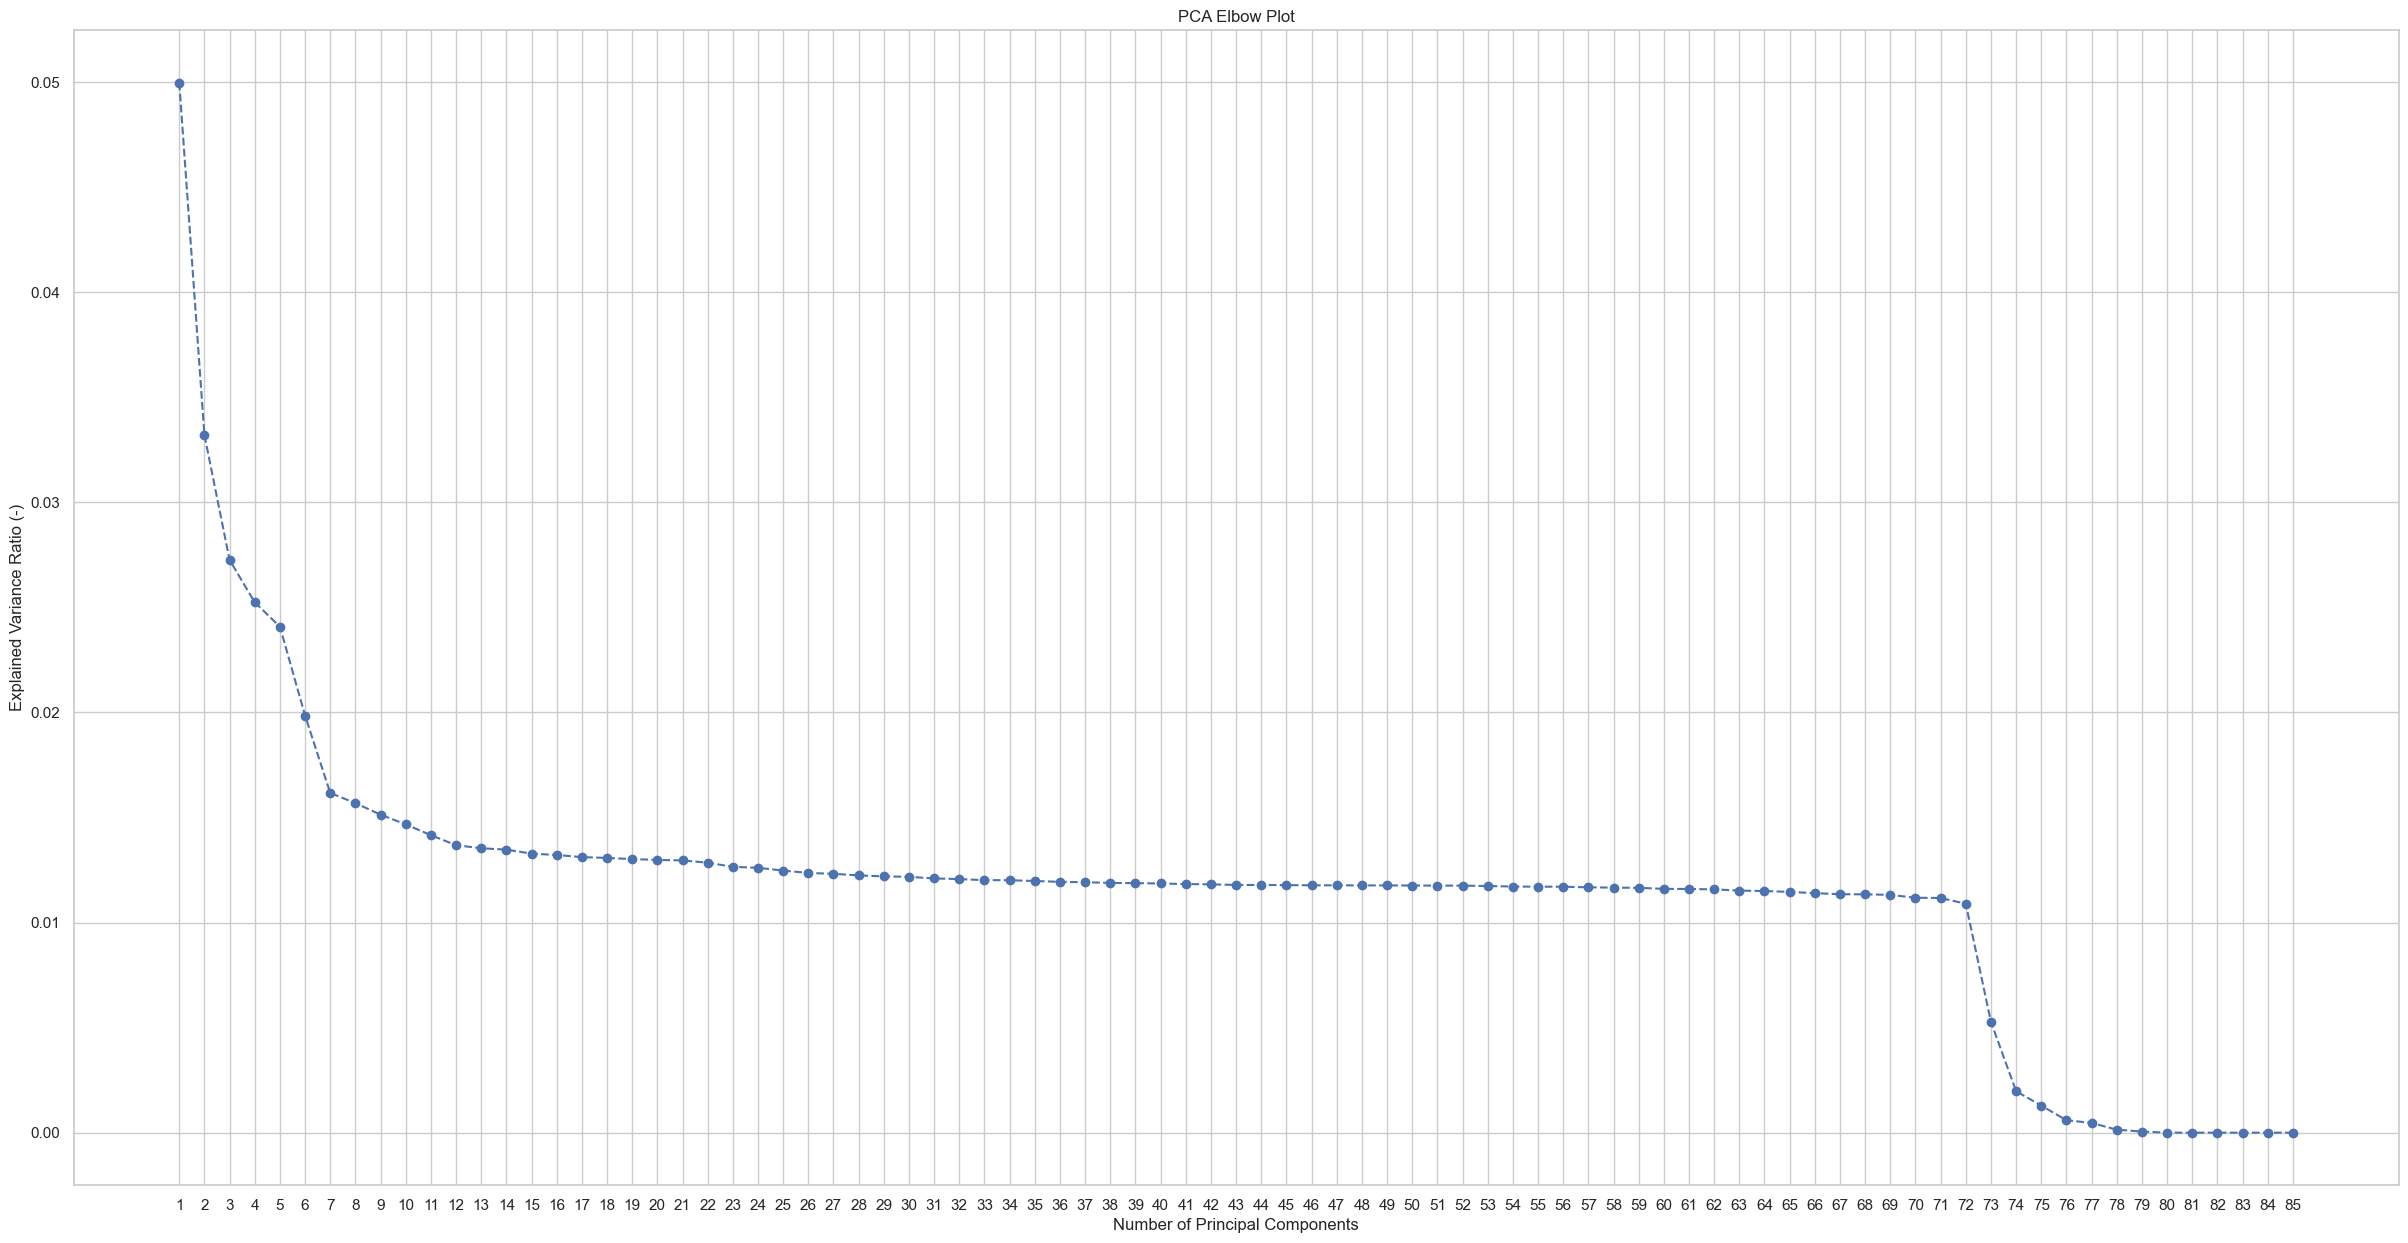

In [86]:
plt.figure(figsize=(30,15))
sns.set(style='whitegrid')

plt.plot(range(1, len(pca_s.explained_variance_ratio_) + 1),
        pca_s.explained_variance_ratio_, marker='o', linestyle='--')
plt.xlabel('Number of Principal Components')
plt.ylabel('Explained Variance Ratio (-)')
plt.title('PCA Elbow Plot')
plt.xticks(range(1, len(pca.explained_variance_ratio_) + 1))
plt.show();

- Round 85 components causing the most variance - from component 26 the variance caused is very low (0.01) 
- Could be a question of trying both?

In [87]:
n_components = 80
pca_s = PCA(n_components=n_components)
projected = pca_s.fit_transform(X_scaled)

In [88]:
# The amount of variance explained by each of the selected components.
print(pca_s.explained_variance_ratio_)

[4.99609237e-02 3.31966497e-02 2.72495806e-02 2.52348085e-02
 2.40778647e-02 1.98457082e-02 1.61640502e-02 1.56806546e-02
 1.51313551e-02 1.46686835e-02 1.41557995e-02 1.36788646e-02
 1.35332971e-02 1.34675868e-02 1.32775684e-02 1.32119937e-02
 1.31131290e-02 1.30717301e-02 1.30189578e-02 1.29773272e-02
 1.29546125e-02 1.28463400e-02 1.26503903e-02 1.26027311e-02
 1.24713092e-02 1.23579111e-02 1.23165117e-02 1.22422460e-02
 1.21952909e-02 1.21732706e-02 1.20982668e-02 1.20657166e-02
 1.20162527e-02 1.20119387e-02 1.19749860e-02 1.19340530e-02
 1.19173273e-02 1.18841400e-02 1.18727856e-02 1.18565559e-02
 1.18300258e-02 1.18159473e-02 1.17872100e-02 1.17855192e-02
 1.17793576e-02 1.17703155e-02 1.17692352e-02 1.17657193e-02
 1.17642033e-02 1.17607923e-02 1.17559656e-02 1.17539420e-02
 1.17368244e-02 1.17114570e-02 1.17053987e-02 1.17012290e-02
 1.16749798e-02 1.16591363e-02 1.16500500e-02 1.16014061e-02
 1.15937354e-02 1.15782454e-02 1.15178418e-02 1.14977980e-02
 1.14560978e-02 1.139739

In [89]:
total_var = pca_s.explained_variance_ratio_.sum() * 100
print(projected, total_var)

[[-1.56469246e+00  7.07954628e-01  2.87233864e-01 ... -1.36044466e-02
  -1.29417700e-03 -6.10082995e-05]
 [-1.66977547e+00  1.05193789e+00  9.47050208e-02 ... -8.84397996e-04
   6.23093405e-03  5.65715613e-05]
 [-1.98039049e+00  6.05498564e-01  3.27834790e-01 ...  2.08632315e-02
  -1.19769222e-03 -3.07282218e-04]
 ...
 [ 5.28377095e+00  6.50176214e-01 -3.31484677e-01 ... -5.80765315e-01
   3.50265101e-02  4.91290553e-04]
 [ 3.03738584e+00  2.11247483e-01 -1.93624867e-01 ... -5.57846207e-02
   9.45647162e-03  3.15219213e-04]
 [ 5.40224198e+00  7.30846624e-01 -4.66059011e-01 ... -1.04217877e+00
   5.63089818e-02  1.27071767e-04]] 100.0


In [90]:
n_components = 25
pca_s = PCA(n_components=n_components)
projected = pca_s.fit_transform(X_scaled)

In [91]:
# The amount of variance explained by each of the selected components.
print(pca_s.explained_variance_ratio_)

[0.04996084 0.03319511 0.02722407 0.02520754 0.02404361 0.01971077
 0.01594734 0.01516281 0.01487776 0.0143846  0.01364792 0.01323844
 0.01311842 0.01298574 0.01287923 0.01283206 0.01270833 0.01258982
 0.01247712 0.01236331 0.01225452 0.0121453  0.0121375  0.01208301
 0.01195378]


# Model Building

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

**Data Preprocessing**

In [93]:
#Drop y, date and all other features that are collinear with each other and can be infered by other independent features.
X=df.drop([ 'Profit Margins','Date', 'Customer Age','Year_Month', 'Profit','Unit Profit','Unit Profit Margin', 'Cost'], axis=1) 
y=df['Profit Margins'] 

Approch 1 to encode categorical data: dummy encoder.

In [94]:
#Encoding categorical variables using the dummy encoder
X_dummy= pd.get_dummies(X, drop_first = True) 

In [95]:
X_dummy_train, X_dummy_test, y_dummy_train, y_dummy_test = train_test_split(X_dummy, y, test_size=0.2,random_state = 42)
print(X_dummy_train.shape, X_dummy_test.shape, y_dummy_train.shape, y_dummy_test.shape )

(27892, 86) (6973, 86) (27892,) (6973,)


In [96]:
#Scaling the encoded data
scaler = StandardScaler()

X_dummy_train= scaler.fit_transform(X_dummy_train)
    
X_dummy_test= scaler.transform(X_dummy_test)


# Decision Tree Regression

In [97]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error


### Standard Parameters

#### Train the model and predict for y

In [98]:
# Create a decision tree regressor
dt_regressor = DecisionTreeRegressor(random_state= 42)

# Fit the decision tree regressor to the training data
dt_regressor.fit(X_dummy_train, y_dummy_train)

# Make predictions on the testing data
y_pred_dummy = dt_regressor.predict(X_dummy_test)

#### RSME Accuracy Scores 

In [99]:
rmse = np.sqrt(mean_squared_error(y_dummy_test, y_pred_dummy))
print("Root Mean Squared Error: {:.2f}".format(rmse))

Root Mean Squared Error: 4.24


#### Actual versus Predicted Values 

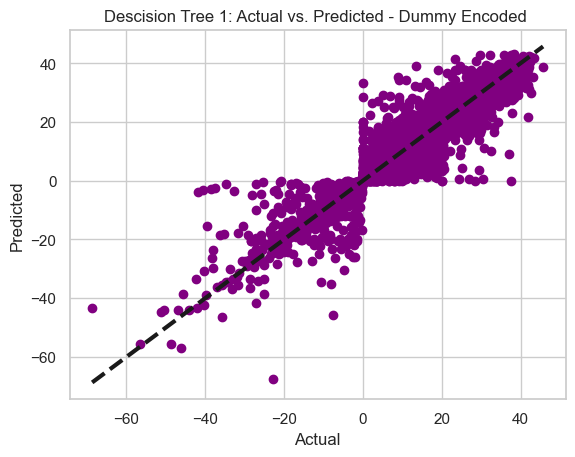

In [100]:
import matplotlib.pyplot as plt
plt.scatter(y_dummy_test, y_pred_dummy, color ='purple')
plt.plot([y_dummy_test.min(), y_dummy_test.max()], [y_dummy_test.min(), y_dummy_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Descision Tree 1: Actual vs. Predicted - Dummy Encoded ')
plt.show()

#### Residuals Plot 
- To determine main differences 

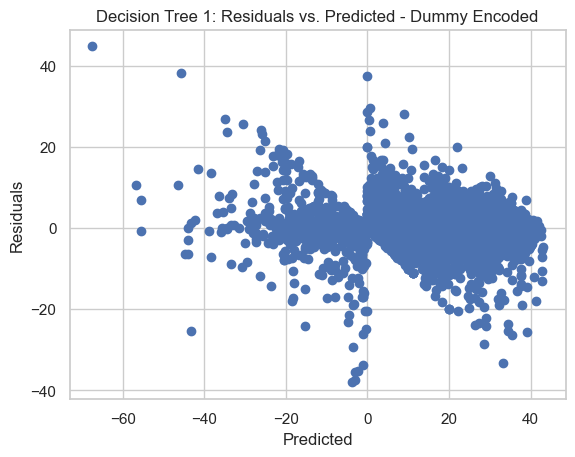

In [101]:
residuals = y_dummy_test - y_pred_dummy
plt.scatter(y_pred_dummy, residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Decision Tree 1: Residuals vs. Predicted - Dummy Encoded')
plt.show()

#### R2 Score

In [102]:
print("Train set R^2: {:.2f}".format(dt_regressor.score(X_dummy_train, y_dummy_train)))
print("Test set R^2: {:.2f}".format(dt_regressor.score(X_dummy_test, y_dummy_test)))

Train set R^2: 1.00
Test set R^2: 0.90


- Model is over fit as the testing set is not perfroming as well as a the training set 

### Hyperparameters

In [103]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 100, 10)}

# Create a decision tree regressor
dt_regressor2 = DecisionTreeRegressor(random_state= 42)

# fit tree on training data
dt_regressor2 = GridSearchCV(dt_regressor2, parameters, 
                    cv=n_folds, 
                   scoring='r2')
dt_regressor2.fit(X_dummy_train, y_dummy_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': range(2, 100, 10)}, scoring='r2')

In [104]:
# scores of GridSearch CV
scores = dt_regressor2.cv_results_
pd.DataFrame(scores)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.177999,0.021172,0.008658,0.007367,2,{'max_depth': 2},0.596626,0.619542,0.603299,0.596246,0.598903,0.602923,0.008680,10
1,0.509860,0.059522,0.009124,0.006977,12,{'max_depth': 12},0.828131,0.824515,0.825420,0.823271,0.825042,0.825276,0.001601,9
2,0.774869,0.042489,0.008800,0.003558,22,{'max_depth': 22},0.859825,0.856112,0.858423,0.861262,0.853199,0.857764,0.002846,8
3,0.939634,0.059478,0.009878,0.003300,32,{'max_depth': 32},0.874980,0.881201,0.878384,0.864944,0.867004,0.873303,0.006333,7
4,0.972167,0.047912,0.009769,0.004829,42,{'max_depth': 42},0.878268,0.889093,0.883636,0.871406,0.875937,0.879668,0.006143,6
5,1.052521,0.089044,0.016063,0.001668,52,{'max_depth': 52},0.884836,0.895932,0.889861,0.877834,0.881636,0.886020,0.006334,5
6,1.129780,0.059381,0.015304,0.002669,62,{'max_depth': 62},0.886690,0.895694,0.888417,0.878379,0.881322,0.886100,0.006004,4
7,0.992522,0.099785,0.015226,0.007713,72,{'max_depth': 72},0.887142,0.895694,0.891688,0.880795,0.886333,0.888330,0.005053,3
8,1.027816,0.024500,0.012720,0.004827,82,{'max_depth': 82},0.887142,0.895694,0.891688,0.882718,0.885236,0.888496,0.004644,1
9,1.059184,0.051018,0.006619,0.007055,92,{'max_depth': 92},0.887142,0.895694,0.891688,0.882718,0.885236,0.888496,0.004644,1


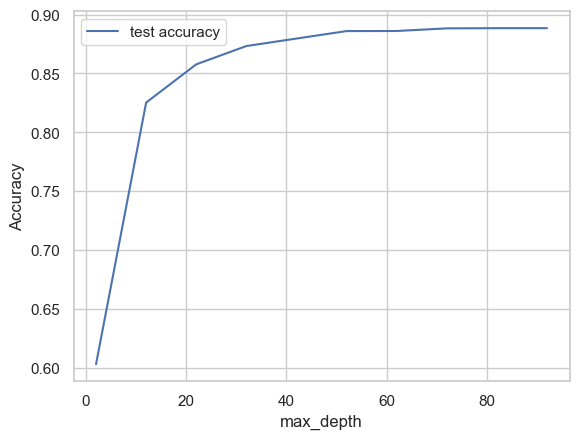

In [105]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()


- Need to tune max depth between 50 - 90 

In [106]:
param_grid = {
    'max_depth': range(50,90,5),
    'min_samples_leaf': range(1, 200, 50),
    'min_samples_split': range(2, 20, 50), 
    'max_features': [5, 20]}
# Create a decision tree regressor
    
dt_regressor3 = DecisionTreeRegressor(random_state= 42)
    
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = dt_regressor3, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)

In [107]:
# Fit the grid search to the data
grid_search.fit(X_dummy_train, y_dummy_train)

Fitting 3 folds for each of 64 candidates, totalling 192 fits


GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': range(50, 90, 5), 'max_features': [5, 20],
                         'min_samples_leaf': range(1, 200, 50),
                         'min_samples_split': range(2, 20, 50)},
             verbose=1)

In [108]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.7485823833950954 using {'max_depth': 50, 'max_features': 20, 'min_samples_leaf': 51, 'min_samples_split': 2}


In [109]:
# model with the best hyperparameters
dt_regressor4 = DecisionTreeRegressor(max_depth=50,
                             min_samples_leaf=51, 
                             min_samples_split=2,
                             max_features=20, 
                            random_state = 42)

# Fit the decision tree regressor to the training data
dt_regressor4.fit(X_dummy_train, y_dummy_train)

# Make predictions on the testing data
y_pred = dt_regressor4.predict(X_dummy_test)

#### RSME Accuracy Scores 

In [110]:
rmse = np.sqrt(mean_squared_error(y_dummy_test, y_pred))
print("Root Mean Squared Error: {:.2f}".format(rmse))

Root Mean Squared Error: 6.60


#### Actual versus Predicted Values 

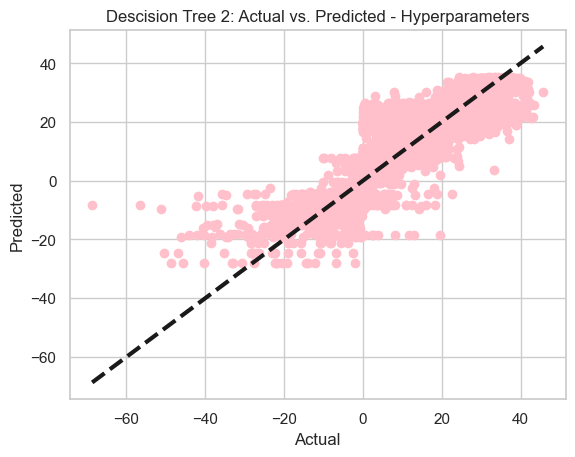

In [111]:
import matplotlib.pyplot as plt
plt.scatter(y_dummy_test, y_pred,  color = 'pink')
plt.plot([y_dummy_test.min(), y_dummy_test.max()], [y_dummy_test.min(), y_dummy_test.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Descision Tree 2: Actual vs. Predicted - Hyperparameters')
plt.show()

#### Residuals Plot 
- To determine main differences 

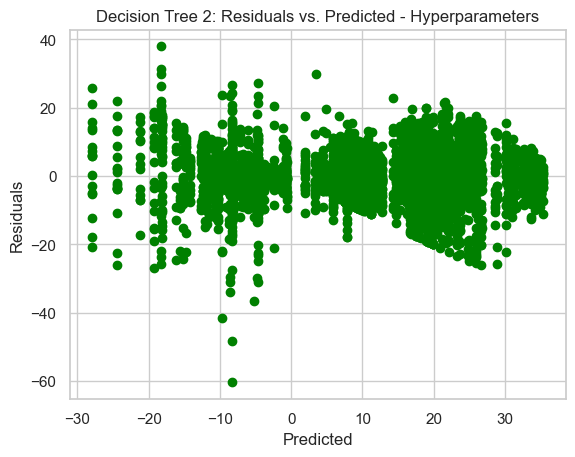

In [112]:
residuals = y_dummy_test - y_pred
plt.scatter(y_pred, residuals, color = 'green')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Decision Tree 2: Residuals vs. Predicted - Hyperparameters')
plt.show()

#### R2 Score

In [113]:
print("Train set R^2: {:.2f}".format(dt_regressor4.score(X_dummy_train, y_dummy_train)))
print("Test set R^2: {:.2f}".format(dt_regressor4.score(X_dummy_test, y_dummy_test)))

Train set R^2: 0.77
Test set R^2: 0.76


- Model is not overfit anymore !
- Accuracy has decreased but the model is more generalised

In [114]:
from sklearn.metrics import r2_score
r2= r2_score(y_dummy_test, y_pred)
print("R^2 score: {:.2f}".format(r2))

R^2 score: 0.76


### Going to Retry with PCA results from above using n_components = 25

In [115]:
#Drop y, date and all other features that are collinear with each other and can be infered by other independent features.
X=df.drop([ 'Profit Margins','Date', 'Customer Age','Year_Month', 'Profit','Unit Profit','Unit Profit Margin', 'Cost'], axis=1) 
y=df['Profit Margins'] 

In [116]:
#Encoding categorical variables using the dummy encoder
X_pca= pd.get_dummies(X, drop_first = True) 

#### Apply PCA and split data into test and train with a 20/80 split respectively

In [117]:
# Apply PCA and apply 72 component from the analysis above
pca = PCA(n_components=72)
X_pca = pca.fit_transform(X_dum)

In [118]:
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,  y, test_size=0.2,random_state = 42)
print(X_train_pca.shape, X_test_pca.shape, y_train_pca.shape, y_test_pca.shape )

(27892, 72) (6973, 72) (27892,) (6973,)


#### Create model and use to predict 

In [119]:
# Create a decision tree regressor
dt_regressor5 = DecisionTreeRegressor(max_depth=50,
                             min_samples_leaf=51, 
                             min_samples_split=2,
                             max_features=20, 
                            random_state = 42)


# Fit the decision tree regressor to the training data
dt_regressor5.fit(X_train_pca, y_train_pca)

# Make predictions on the testing data
y_pred_pca = dt_regressor5.predict(X_test_pca)

#### RSME Accuracy Scores 

In [120]:
rmse = np.sqrt(mean_squared_error(y_test_pca, y_pred_pca))
print("Root Mean Squared Error: {:.2f}".format(rmse))

Root Mean Squared Error: 5.14


#### Actual versus Predicted Values 

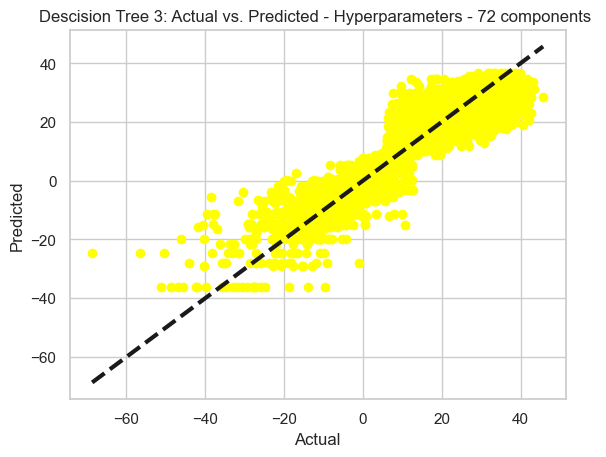

In [121]:
import matplotlib.pyplot as plt
plt.scatter(y_dummy_test, y_pred_pca, color ='yellow')
plt.plot([y_test_pca.min(),y_test_pca.max()], [y_test_pca.min(), y_test_pca.max()], 'k--', lw=3)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Descision Tree 3: Actual vs. Predicted - Hyperparameters - 72 components ')
plt.show()

#### Residuals Plot 
- To determine main differences 

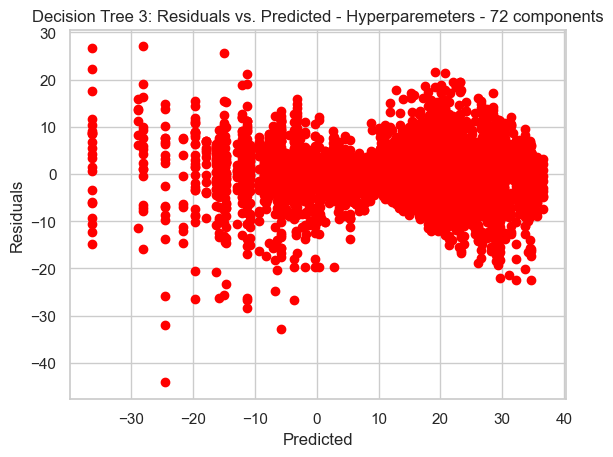

In [122]:
residuals = y_test_pca - y_pred_pca
plt.scatter(y_pred_pca, residuals, color = 'red')
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Decision Tree 3: Residuals vs. Predicted - Hyperparemeters - 72 components')
plt.show()

#### R2 Score

In [123]:
from sklearn.metrics import r2_score

r2= r2_score(y_test_pca, y_pred_pca)
print("R^2 score based on true versus predicted: {:.2f}".format(r2))

R^2 score based on true versus predicted: 0.85


In [124]:
# Fit the decision tree regressor to the training data
score = dt_regressor5.score(X_train_pca, y_train_pca)
print("R^2 training score: {:.2f}".format(score))

R^2 training score: 0.88


In [125]:
# Fit the decision tree regressor to the training data
score = dt_regressor5.score(X_test_pca, y_test_pca)
print("R^2 testing score: {:.2f}".format(score))

R^2 testing score: 0.85


- PCA reduced data set works much better and is not overfit 

### SVR

- SVR could be used for predicting the sales or the profit/loss based on non-linear relationships between features, such as the interaction between age group and product group, or the effect of gender on sales. 
- SVR can handle non-linear relationships between features and can be useful when there is no clear linear relationship between the independent and dependent variables.

In [126]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

#Drop y, date and all other features that are collinear with each other and can be infered by other independent features.
X=df.drop(['Loss','Date','Customer Age','Year_Month', 'Profit', 'Profit Margins', 'Unit Profit','Unit Profit Margin', 'Cost'], axis=1) 
X = pd.get_dummies(X, drop_first = True)
y=df['Loss'] 

In [127]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an SVR object with RBF kernel
svr = SVR(kernel='rbf', C=10, gamma=0.1, epsilon=0.1)

# Fit the model on the training set
svr.fit(X_train, y_train)

SVR(C=10, gamma=0.1)

In [128]:
# Define the hyperparameter grid to search

param_grid = {'C': [0.1, 1, 10], 'gamma': [0.1, 1, 10], 'epsilon': [0.1, 1, 10]}

# Create an SVR object
svr = SVR(kernel='rbf')

In [129]:
# Create a GridSearchCV object with 5-fold cross-validation
grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train[:1000], y_train[:1000])

# Print the best hyperparameters and corresponding validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Validation score:", -grid_search.best_score_)

Best hyperparameters: {'C': 0.1, 'epsilon': 0.1, 'gamma': 0.1}
Validation score: 0.11003339586630263


In [130]:
# Evaluate the model on the training set
# Fit the GridSearchCV object to the training data
grid_search.fit(X_train[:1000], y_train[:1000])

# Get the best estimator from GridSearchCV
best_svr = grid_search.best_estimator_

y_train_pred = best_svr.predict(X_train)
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_train_pred)

print("Training set performance:")
print('Mean Squared Error:', mse_train)
print('Root Mean Squared Error:', rmse_train)
print('R^2 score:', r2_train)

Training set performance:
Mean Squared Error: 0.11833839307576025
Root Mean Squared Error: 0.344003478290206
R^2 score: 0.013337255824354632


In [131]:
# Evaluate the model on the test set
y_test_pred = best_svr.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

print("Test set performance:")
print('Mean Squared Error:', mse_test)
print('Root Mean Squared Error:', rmse_test)
print('R^2 score:', r2_test)

Test set performance:
Mean Squared Error: 0.11852982592398462
Root Mean Squared Error: 0.34428160846026123
R^2 score: 0.007672161633768049


In [132]:
# Apply k-fold cross-validation
cv_scores = cross_val_score(svr, X, y, cv=5, scoring='neg_mean_squared_error')
cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-validation performance:")
print('Mean RMSE:', cv_rmse_scores.mean())
print('Std RMSE:', cv_rmse_scores.std())

Cross-validation performance:
Mean RMSE: 0.26205893872026614
Std RMSE: 0.0015584497004415784


In [133]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    make_pipeline(StandardScaler(), svr), X, y, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), shuffle=True, random_state=42)
train_rmse_scores = np.sqrt(-train_scores.mean(axis=1))
test_rmse_scores = np.sqrt(-test_scores.mean(axis=1))

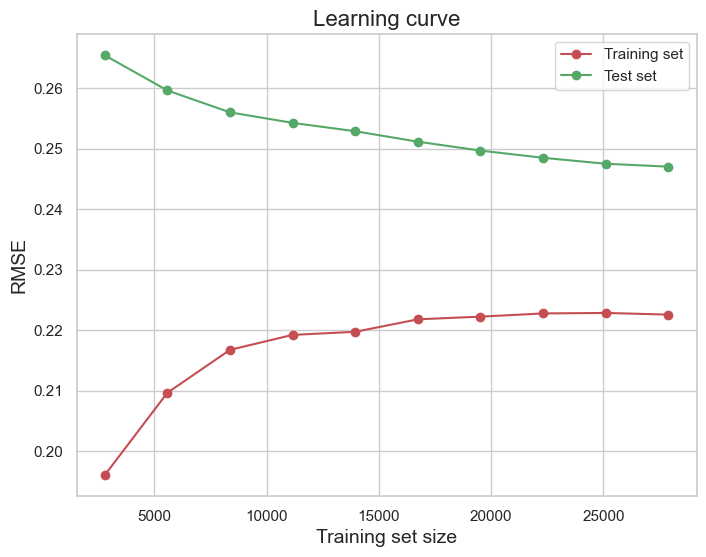

In [134]:
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_rmse_scores, 'o-', color='r', label='Training set')
plt.plot(train_sizes, test_rmse_scores, 'o-', color='g', label='Test set')
plt.xlabel('Training set size', fontsize=14)
plt.ylabel('RMSE', fontsize=14)
plt.title('Learning curve', fontsize=16)
plt.legend(loc='best')
plt.show()

In [135]:
# Fit the SVR model to the training data
svr.fit(X_train, y_train)

# Evaluate the model on the test set
y_svr_pred = svr.predict(X_test)

# Print the predicted values
print("Predicted values:", y_svr_pred)

Predicted values: [0.08434917 0.10056198 0.09095069 ... 0.01859683 0.15857858 0.07370973]


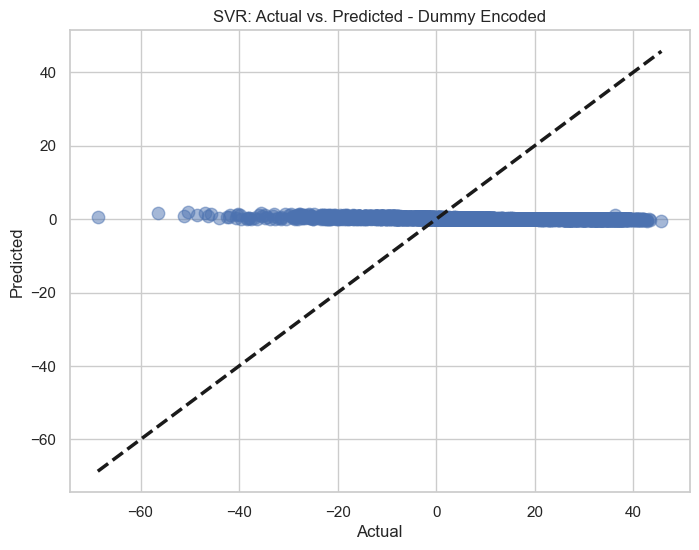

In [136]:
# Plot scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_dummy_test, y_svr_pred, alpha=0.5, s=80)
plt.plot([y_dummy_test.min(), y_dummy_test.max()], [y_dummy_test.min(), y_dummy_test.max()], 'k--', lw=2.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Actual vs. Predicted - Dummy Encoded')
plt.show()

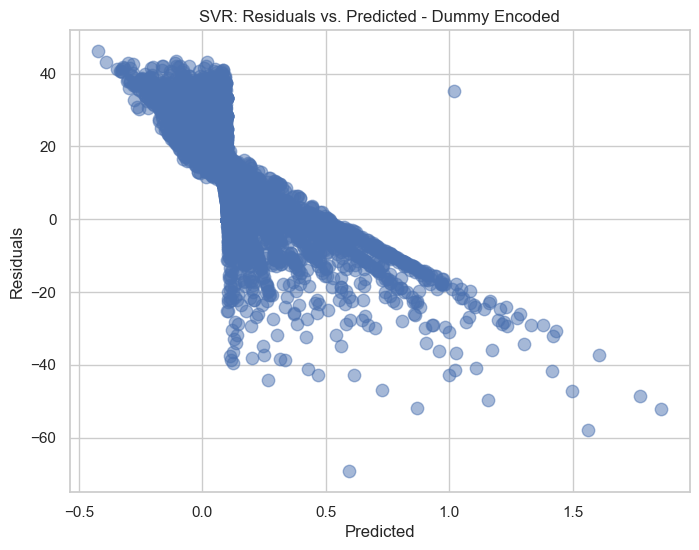

In [137]:
# Plot residual plot of predicted vs. residual values
residuals = y_dummy_test - y_svr_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_svr_pred, residuals, alpha=0.5, s=80)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('SVR: Residuals vs. Predicted - Dummy Encoded')
plt.show()

In [138]:
# Scale the data using the standard scaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [139]:
# Create an SVR object with RBF kernel
svr = SVR(kernel='rbf', C=1, gamma=0.1, epsilon=0.1)

# Train the model on the training data
svr.fit(X_train_scaled, y_train)

# Predict the target variable for the test data
y_svr_pred = svr.predict(X_test_scaled)

In [140]:
# Calculate the error values
mse = mean_squared_error(y_test, y_svr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_svr_pred)
print('Mean Squared Error:', mse)
print('Root Mean Squared Error:', rmse)
print('R^2 score:', r2)

Mean Squared Error: 0.07541626058669046
Root Mean Squared Error: 0.2746202115407576
R^2 score: 0.3686175250636934


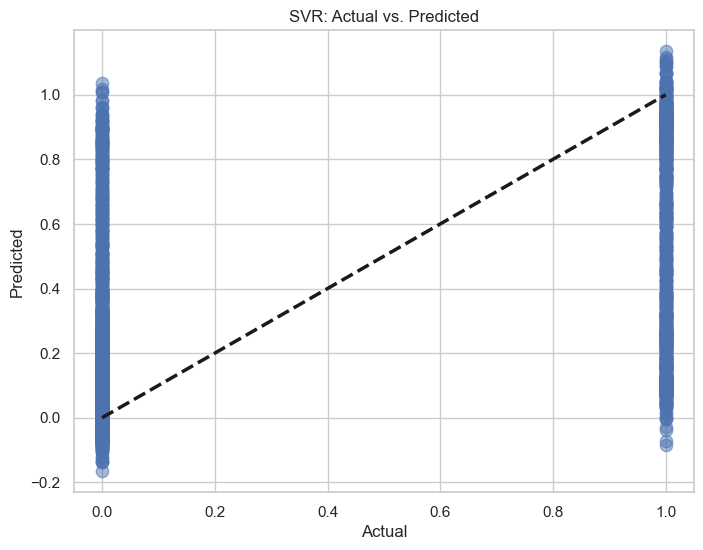

In [141]:
# Plot scatter plot of actual vs. predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_svr_pred, alpha=0.5, s=80)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2.5)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('SVR: Actual vs. Predicted')
plt.show()

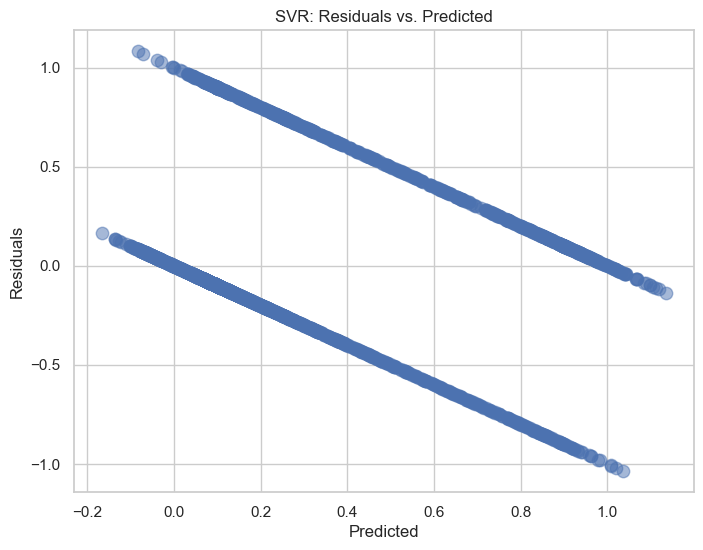

In [142]:
# Plot residual plot of predicted vs. residual values
residuals = y_test - y_svr_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_svr_pred, residuals, alpha=0.5, s=80)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('SVR: Residuals vs. Predicted')
plt.show()

# PREDICTING PROFIT LOSS WITH RANDOM FOREST CLASSIFIER

In [12]:
#Drop y, date and all other features that are collinear with each other and can be infered by other independent features.
X2=df.drop(['Loss','Date', 'Customer Age','Year_Month', 'Profit', 'Profit Margins', 'Unit Profit','Unit Profit Margin', 'Cost'], axis=1) 
y2=df['Loss'] 

In [13]:
X_rf= pd.get_dummies(X2, drop_first = True) 

In [14]:
X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(X_rf, y2, test_size=0.2,random_state = 42)
print(X_rf_train.shape, X_rf_test.shape, y_rf_train.shape, y_rf_test.shape )

(27892, 85) (6973, 85) (27892,) (6973,)


In [15]:
scaler = StandardScaler()

X_rf_train= scaler.fit_transform(X_rf_train)
    
X_rf_test= scaler.transform(X_rf_test)

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


In [17]:
# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 30, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy")
rf.fit(X_rf_train, y_rf_train)


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 30, 5)}, scoring='accuracy')

In [18]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.512693,0.038419,0.028720,0.001621,2,{'max_depth': 2},0.860548,0.860548,0.860703,0.860703,0.860703,0.860641,0.000076,6
1,0.892398,0.025723,0.039374,0.001718,7,{'max_depth': 7},0.917369,0.924180,0.926138,0.927931,0.926856,0.924495,0.003767,5
2,1.260579,0.034179,0.056023,0.002623,12,{'max_depth': 12},0.928123,0.935831,0.935281,0.934923,0.936716,0.934175,0.003086,4
3,1.542623,0.057524,0.067113,0.005918,17,{'max_depth': 17},0.933142,0.939595,0.940660,0.941556,0.940660,0.939123,0.003054,3
4,1.629387,0.010881,0.070790,0.007087,22,{'max_depth': 22},0.936189,0.942821,0.941377,0.942632,0.943170,0.941238,0.002596,2


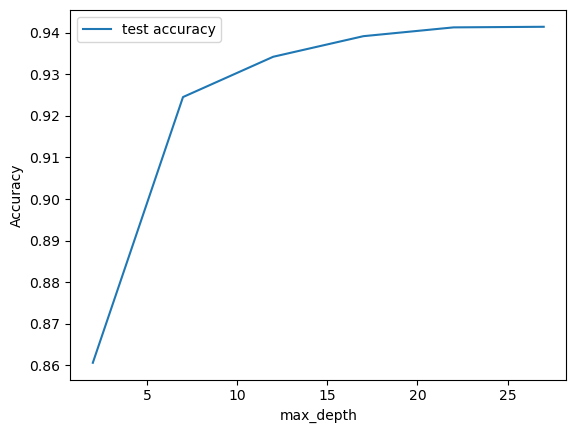

In [19]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [20]:
param_grid = {
    'max_depth': [5,30,5],
    'n_estimators': [100,200, 300], 
    'max_features': [5, 12]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 2)

In [21]:
grid_search.fit(X_rf_train, y_rf_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5, 30, 5], 'max_features': [5, 12],
                         'n_estimators': [100, 200, 300]},
             verbose=2)

In [22]:
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.9447871252586226 using {'max_depth': 30, 'max_features': 12, 'n_estimators': 200}


In [34]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=17,
                            
                             max_features=12,
                             n_estimators=200)

In [35]:
rfc.fit(X_rf_train,y_rf_train)

RandomForestClassifier(max_depth=17, max_features=12, n_estimators=200)

In [36]:
predictions_train=rfc.predict(X_rf_train)

In [37]:
predictions_test = rfc.predict(X_rf_test)

In [38]:
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_rf_train,predictions_train)) )

Accuracy: 0.97


In [39]:
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_rf_test,predictions_test)) )

Accuracy: 0.95


In [40]:
print(classification_report(y_rf_test,predictions_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      6006
           1       0.92      0.68      0.78       967

    accuracy                           0.95      6973
   macro avg       0.93      0.83      0.87      6973
weighted avg       0.95      0.95      0.94      6973



<Axes: >

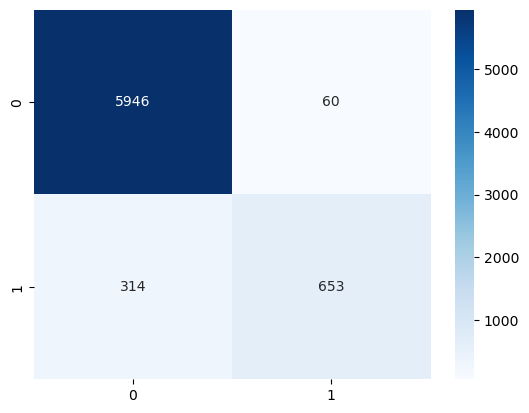

In [41]:
cm=confusion_matrix(y_rf_test,predictions_test)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

Obtaining feature importance and just plotting features with importance >= 0.05 

In [42]:
feature_imp = pd.Series(rfc.feature_importances_).sort_values(ascending = False)
feature_imp_prop = feature_imp.apply(lambda x: '{:.4f}'.format(x))
feature_imp_prop


4     0.1819
64    0.1252
3     0.1099
2     0.1068
0     0.0827
       ...  
43    0.0000
38    0.0000
55    0.0000
60    0.0000
39    0.0000
Length: 85, dtype: object

Text(0.5, 0, 'Random Forest Feature Importance')

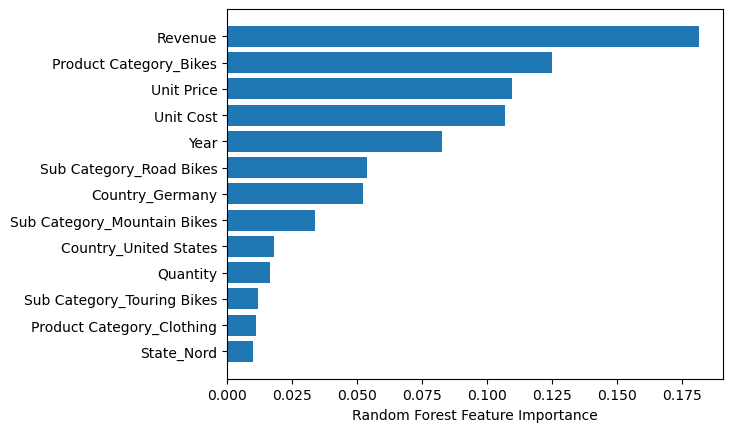

In [43]:
# Set threshold for importance score
threshold = 0.01

# Get indices of important features
important_idx = np.where(rfc.feature_importances_ > threshold)[0]

# Get labels and importance scores of important features
important_labels = X_rf.columns[important_idx]
important_scores = rfc.feature_importances_[important_idx]

# Sort features by importance score
sorted_idx = important_scores.argsort()

# Plot horizontal bar chart
plt.barh(important_labels[sorted_idx], important_scores[sorted_idx])
plt.xlabel("Random Forest Feature Importance")